<a href="https://colab.research.google.com/github/BhattaraiH/BhattaraiH/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CDC Diabetes Health Indicators

---
**Associated Tasks**
Classification


The end objective of this analysis is to predict the diabetes status of U.S. adults based on various lifestyle-related factors and healthcare statistics using multiple supervised machine learning (ML) models. Specifically, logistic regression (LR), decision tree (DT), and five ensemble ML models will be employed to predict diabetic status.

Before initializing ML models, let's first conduct exploratory data analysis!

##Dataset overview:
**Independent Variables:**

1. High Blood Pressure [HighBP]: 0 = No high BP, 1 = high BP
2. High Cholesterol [HighChol]:  0 = No high cholesterol, 1 = high cholesterol
3. BMI [BMI]: Contineous number
4. Chlosterol check [CholCheck]: 0: No cholesterol check in 5 years, 1: Yes cholesterol check in 5 years
5. Smoker [Smoker]:              0: No, 1: Yes
Have you smoked at least 100 cigarettes in your entire life?

6. Ever had a stroke? [Stroke]: 0: No, 1: Yes
7. Ever had coronary heart disease (CHD) or myocardial infarction (MI) [HeartDiseaseorAttack]: 0: No, 1: Yes
8. Physical activities in the past 30 days[PhysActivity]: 0: No, 1: Yes
9. Consume Fruit 1 or more times per day [Fruits]: 0: No, 1: Yes
10. Consume Vegetables 1 or more times per day  [Veggies]: 0: No, 1: Yes
11. Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) [HvyAlcoholConsump]: 0: No, 1: Yes
12. Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. [AnyHealthcare]: 0: No, 1: Yes
13. Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? [NoDocbcCost]: 0: No, 1: Yes
14. Would you say that in general your health is: scale 1-5 [GenHlth]: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
15. For how many days during the past 30 days was your mental health not good? [MentHlth]: Scale 1 to 30
16. For how many days during the past 30 days was your physical health not good? [PhysHlth]: Scale 1 to 30
17. Do you have serious difficulty walking or climbing stairs? [DiffWalk]: 0: No, 1: Yes
18. Sex: 0 = female 1 = male
19. Age:
        1 Age 18 to 24 [18 <= AGE <= 24]
        2 Age 25 to 29 [25 <= AGE <= 29]
        3 Age 30 to 34 [30 <= AGE <= 34]
        4 Age 35 to 39 [35 <= AGE <= 39]
        5 Age 40 to 44 [40 <= AGE <= 44]
        6 Age 45 to 49 [45 <= AGE <= 49]
        7 Age 50 to 54 [50 <= AGE <= 54]
        8 Age 55 to 59 [55 <= AGE <= 59]
        9 Age 60 to 64 [60 <= AGE <= 64]
        10 Age 65 to 69 [65 <= AGE <= 69]
        11 Age 70 to 74 [70 <= AGE <= 74]
        12 Age 75 to 79 [75 <= AGE <= 79]
        13 Age 80 or older [80 <= AGE <= 99]

20. Education:
            1= Never attended school or only kindergarten
            2 = Grades 1 through 8 (Elementary)
            3 = Grades 9 through 11 (Some high school)
            4 = Grade 12 or GED (High school graduate)
            5 = College 1 year to 3 years (Some college or technical school)
            6 = College 4 years or more (College graduate)
21. Income: Income scale
          1 Less than $10,000
          2 $10,000 to less than $15,000
          3 $15,000 to less than $20,000
          4 $20,000 to less than $25,000
          5 $25,000 to less than $35,000
          6 $35,000 to less than $50,000  
          7 $50,000 to less than $75,000
          8 $75,000 or more
          77 Don’t know/Not sure
          99 Refused  
          BLANK Not asked or Missing

**Dependent variable: Diabetes_binary**
0 = no diabetes 1 = prediabetes or diabetes


In [ ]:
# -*- Certificate of Completion -*-
class MachineLearningCourse:
  def __init__(self, student_name: str):
    self.student = student_name
    self.course = "Machine Learning with Python"
    self.celebrate_completion()
  def celebrate_completion(self):
    """Method to celebrate and acknowledge the student's success."""
    congratulations = f"🎉 Congratulations {self.student}! 🎉"
    achievement = f"You've successfully trained algorithms in " \
    f"{self.course}."
    print(congratulations, achievement)
# Creating an instance for the graduate
graduate = MachineLearningCourse(student_name = "Harihar Bhattarai")
# Note: This certificate validates the successful completion of the course.

🎉 Congratulations Harihar Bhattarai! 🎉 You've successfully trained algorithms in Machine Learning with Python.


Let's import the data directly from the UCI data repository.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
# metadata
print(cdc_diabetes_health_indicators.metadata)
# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
#Load libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import pearsonr

In [ ]:
# Convert to DataFrame
data = pd.DataFrame(X)
data['Diabetes_binary'] = y  # Adding the target variable

In [ ]:
# Display the data
print(data.shape)
data.head()

(253680, 22)


HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
0        15         1    0    9          4       3                0  
1         0         0    0    7          6       1                0  
2        30         1    0    9          4       8                0  
3         0         0    0   11          3       6                0  
4         0         0    0   11          5       4                0  

[5 rows x 22 columns]

In [ ]:
#What types of variables we have in the data.
data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

NOTE: All values in the data are integers. However, we know we have some categorical variables in the data and those categories are labeled by integers.

In [ ]:
#DO we have any missing  values.
print(data.isnull().sum())
#No missing values in the data.

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64



Converting categorical variables into a numeric format may not be needed for the EDA. However, we want to prepare the data for the ML models, so let's make the data ready.  Binary variables can remain as is if they are already encoded as 0s and 1s. Multi-level categorical variables should be encoded.

One-hot encoding is not strictly necessary for decision trees and XGBoost models. Our goal here to start from the basic regression models and move on to the more robust models for a comparison purpose. Thus, we are going to recode all multi-level categorical variables into binary variables.

In [ ]:
#Convert some categorical variables into categories instead of int.
data[['GenHlth', 'Age', 'Education', 'Income']] = data[['GenHlth', 'Age', 'Education', 'Income']].astype('category')
data.dtypes

HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                   int64
Sex                        int64
Age                     category
Education               category
Income                  category
Diabetes_binary            int64
dtype: object

In [ ]:
# One-hot encode categorical variables
categorical_features = ['GenHlth', 'Age', 'Education', 'Income']
continuous_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','DiffWalk','Sex',
                        'Diabetes_binary']

encoder = OneHotEncoder(sparse=False, drop='first')  # drop first to avoid multicollinearity
encoded_categorical = encoder.fit_transform(data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Reset indices
X_continuous_reset = data[continuous_features].reset_index(drop=True)
encoded_categorical_df_reset = encoded_categorical_df.reset_index(drop=True)
encoded_categorical_df_reset1=encoded_categorical_df_reset.astype(int)
encoded_categorical_df_reset1

# Concatenate again
df = pd.concat([X_continuous_reset, encoded_categorical_df_reset1], axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  Education_4  Education_5  Education_6  \
0             0       0        1  ...            1            0            0   
1             1       0        0  ...            0            0            1   
2             0       1        0  ...            1            0            0   
3             1       1        1  ...            0            0            0   
4             1       1        1  ...            0            1            0   

   Income_2  Income_3  Income_4  Income_5  Income_6  Income_7  Income_8  
0         0         1         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         0         0         0         0         1  
3         0         0         0         0         1         0         0  
4         0         0         1         0         0         0         0  

[5 rows x 46 columns]

In [ ]:
#What types of variables we have in the data.
df.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Diabetes_binary         int64
GenHlth_2               int64
GenHlth_3               int64
GenHlth_4               int64
GenHlth_5               int64
Age_2                   int64
Age_3                   int64
Age_4                   int64
Age_5                   int64
Age_6                   int64
Age_7                   int64
Age_8                   int64
Age_9                   int64
Age_10                  int64
Age_11                  int64
Age_12                  int64
Age_13                  int64
Education_2             int64
Education_3             int64
Education_4             int64
Education_5             int64
Education_6             int64
Income_2                int64
Income_3                int64
Income_4                int64
Income_5                int64
Income_6                int64
Income_7                int64
Income_8                int64
dtype: object

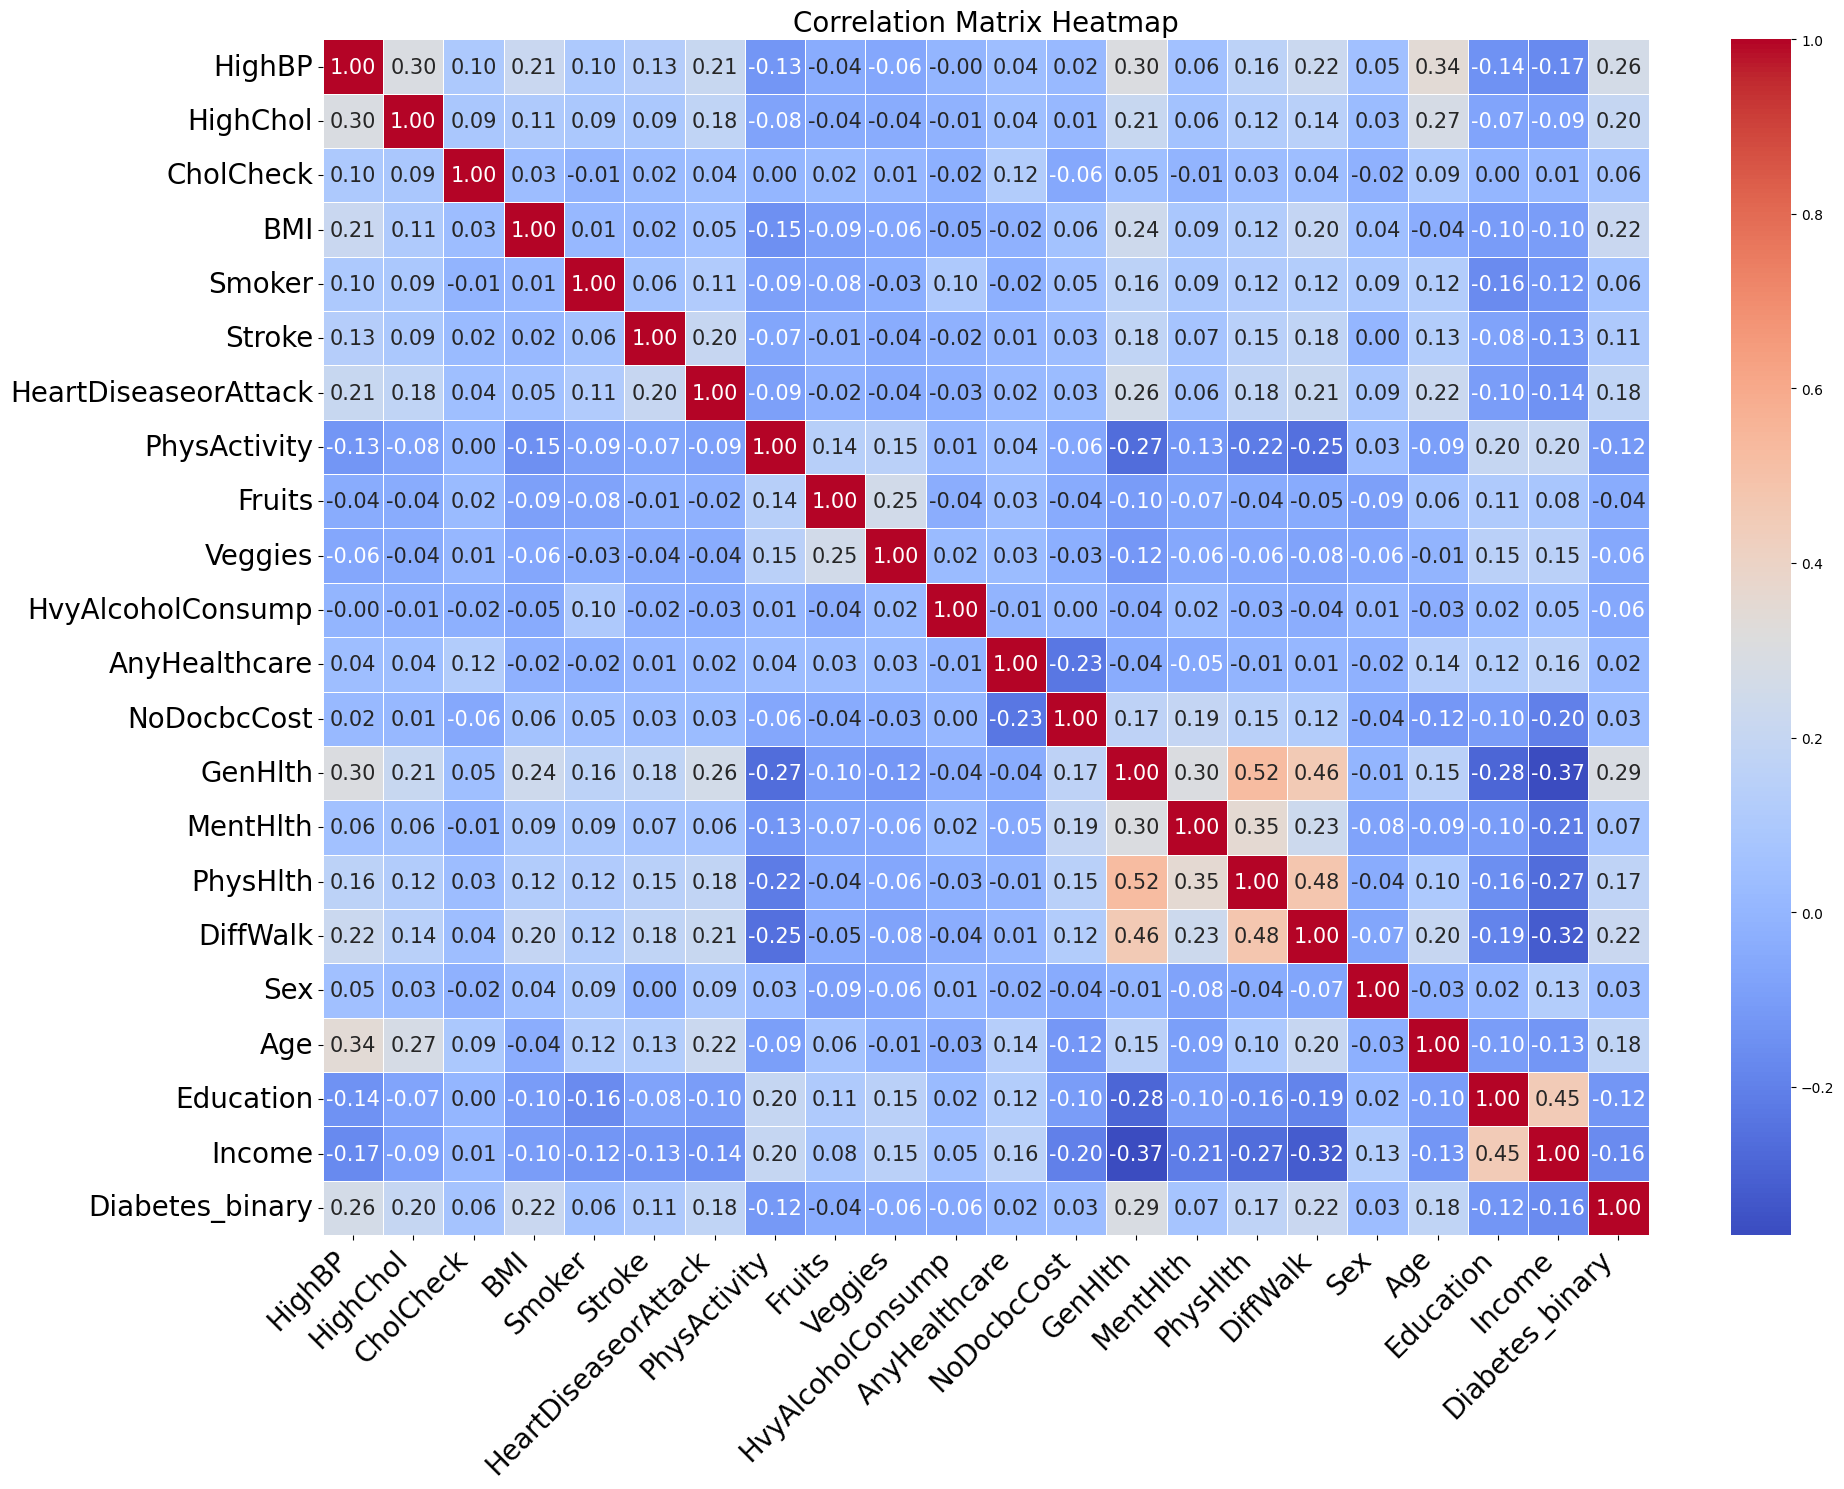

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 15})

# Add titles and labels for clarity
plt.title('Correlation Matrix Heatmap', size=20)

# Adjust tick labels for readability
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(rotation=0, size=10)  # Set rotation to 0 for horizontal y-axis labels

# Set the font size of the x tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('CorrMetrics.png', bbox_inches = 'tight', dpi=300)
# Show plot
plt.show()

The phi coefficient is a measure of association between two variables in a 2x2 contingency table. It is calculated by taking the square root of the chi-square statistic divided by the number of observations.
I am going to calculate a phi coefficient between two binary variables just to make sure the above corr() function returned the phi coefficient between binary variables instead of the pearson.

In [ ]:
contingency_table = pd.crosstab(df['HighBP'], df['HighChol'])
# Calculate the phi coefficient
phi_coefficient = np.sqrt(chi2_contingency(contingency_table)[0] / (contingency_table.sum().sum()))
# Print the phi coefficient
print(phi_coefficient)

0.2981912370957692


NOTE: Great! It is confirmed that the corr() function does return the phi coefficient once it encounters the binary variables.

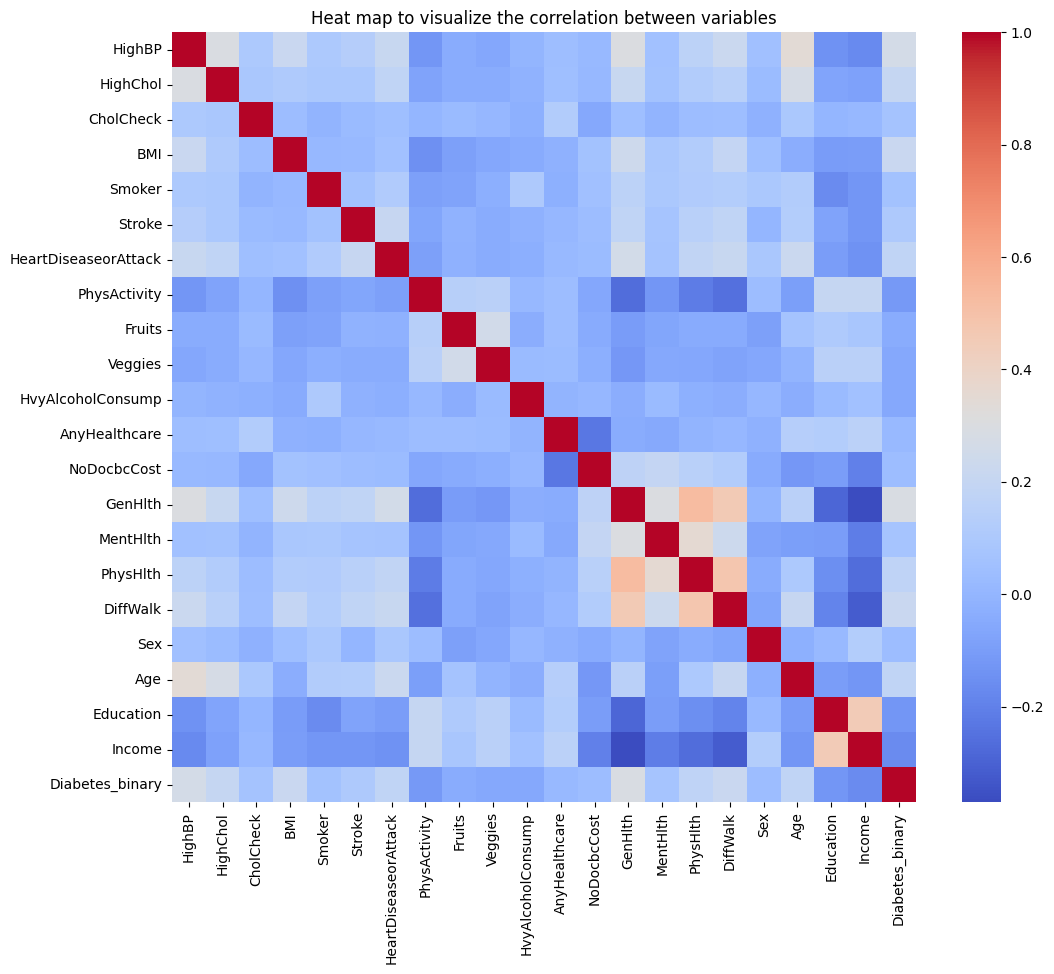

In [ ]:
# Visualize relationship between all variables in a heatmap without numbers
plt.figure(figsize=(12,10))
hm=sns.heatmap(data=corr_matrix, cmap='coolwarm')
hm.set(title = 'Heat map to visualize the correlation between variables')
plt.show()

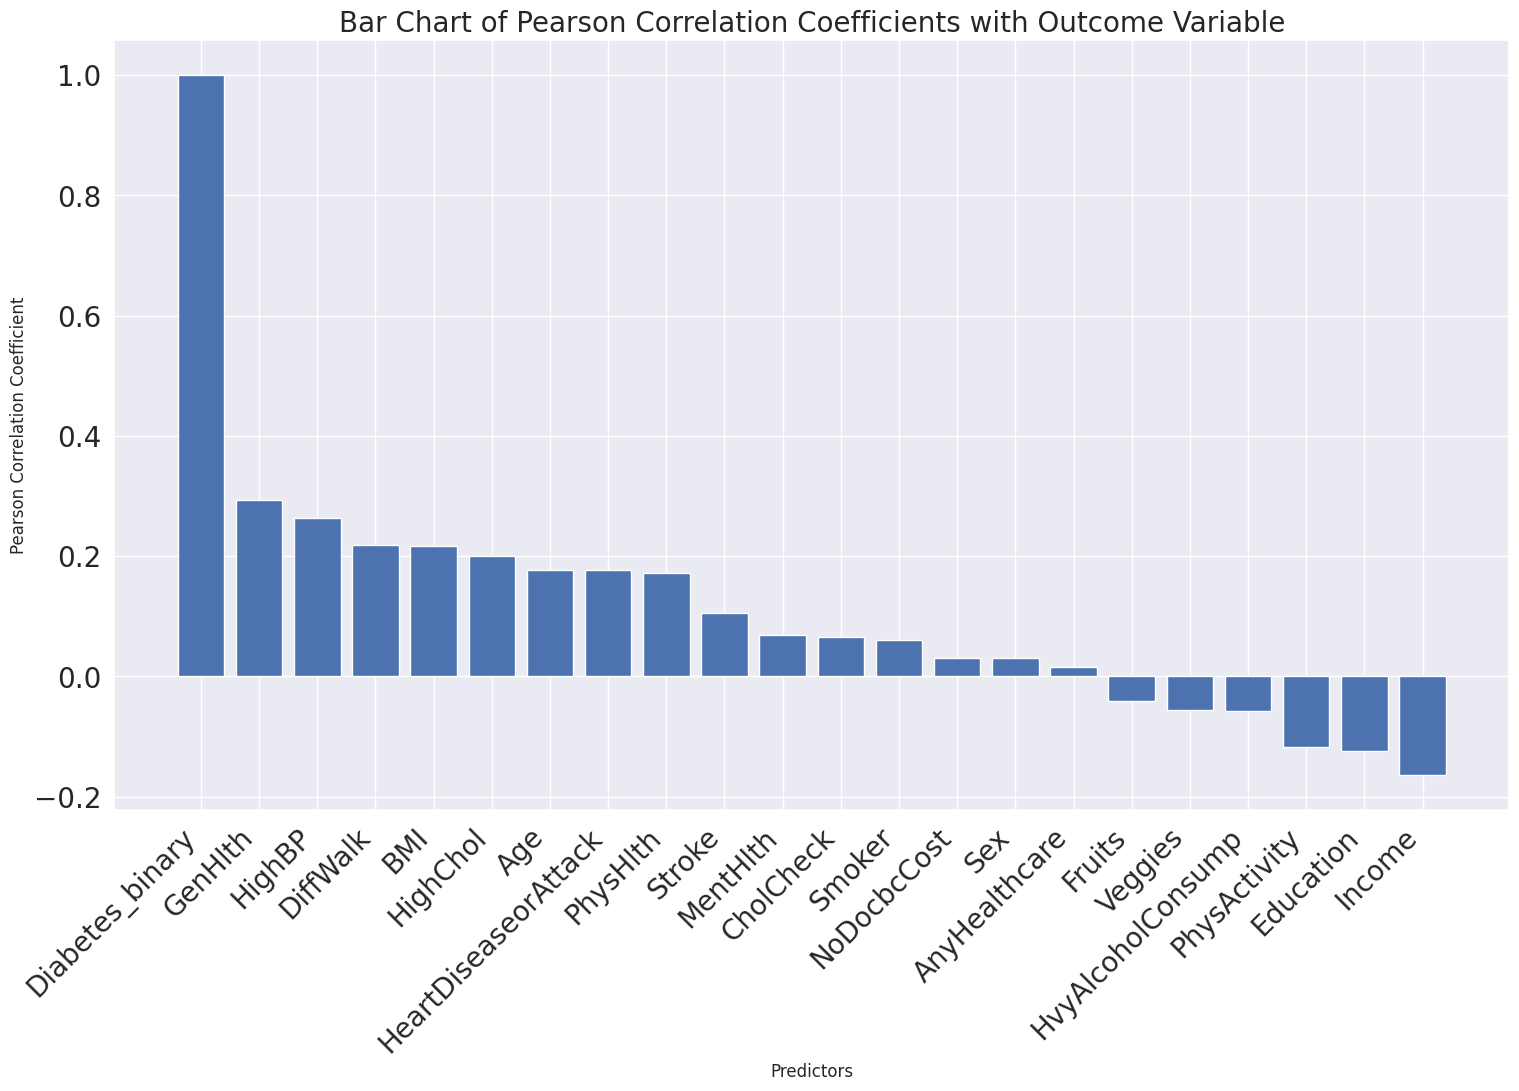

In [ ]:
#correlations
correlations=data.corrwith(data['Diabetes_binary'])
# Create a new dataframe with the correlation values
corr_df = pd.DataFrame(correlations)
# Sort the Pearson correlation coefficients
sorted_pearson_corr = corr_df.sort_values(by=0, ascending=False)

# Set plot sizes bigger so that we have clear plot
sns.set(rc={'figure.figsize': (18, 10)})
plt.rcParams['figure.figsize'] = (18, 10)
# Create a bar chart of the Pearson correlation coefficients
plt.bar(sorted_pearson_corr.index, sorted_pearson_corr.values.flatten())
# Slant the variable names on the x-axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predictors')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Bar Chart of Pearson Correlation Coefficients with Outcome Variable', size=20)

# Adjust tick labels for readability
plt.xticks(rotation=45, ha='right', size=20)
plt.yticks(rotation=0, size=20)  # Set rotation to 0 for horizontal y-axis labels

# Set the font size of the x tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('CorrMetrics.png', bbox_inches = 'tight', dpi=300)
plt.show()

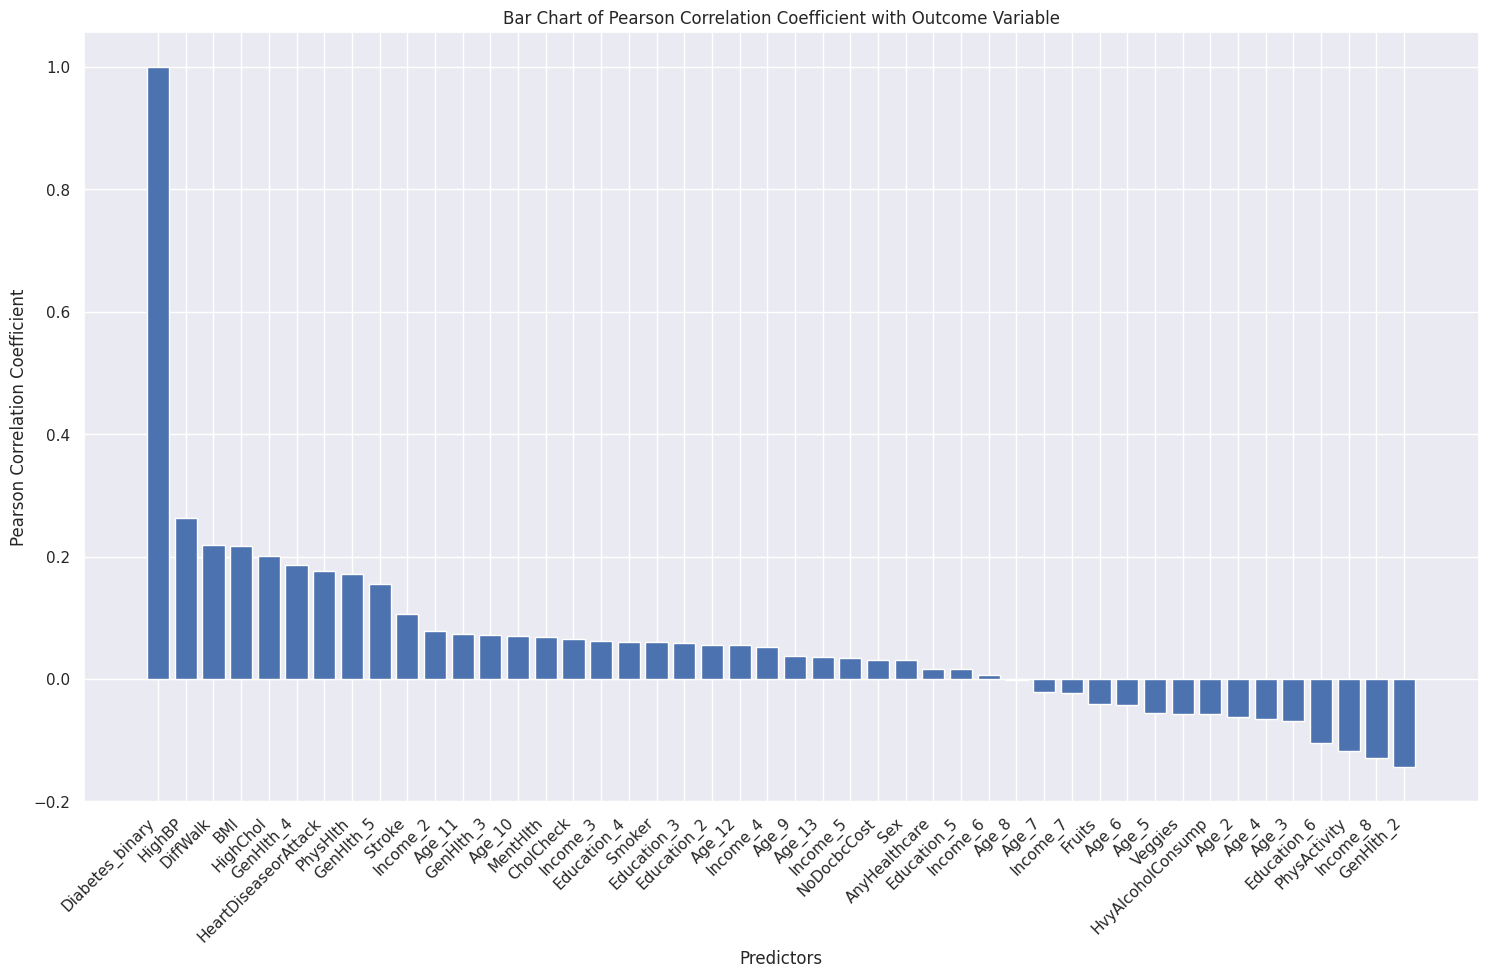

In [ ]:
#Dataset with the binary encoded variables. We will not use this for the project.
#correlations
correlations=df.corrwith(df['Diabetes_binary'])
# Create a new dataframe with the correlation values
corr_df = pd.DataFrame(correlations)
# Sort the Pearson correlation coefficients
sorted_pearson_corr = corr_df.sort_values(by=0, ascending=False)

# Set plot sizes bigger so that we have clear plot
sns.set(rc={'figure.figsize': (18, 10)})
plt.rcParams['figure.figsize'] = (18, 10)
# Create a bar chart of the Pearson correlation coefficients
plt.bar(sorted_pearson_corr.index, sorted_pearson_corr.values.flatten())
# Slant the variable names on the x-axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predictors')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Bar Chart of Pearson Correlation Coefficient with Outcome Variable')
plt.show()


##**Observation**:

Based on the above scatter plots, correlation metrics and heat map, none of the variables are strongly correlated with each other. This will minimize the impact of multicollinearity issues while constructing models later in the analyses.

Two highly correlated variables are physical health with poor general health (0.49) and with serious difficulty walking or climbing stairs in walking (0.48). Overall, this makes sense b/c if ones general health is not in good condition, the likelihood of having bad physical health is high. Similarly, if one has better physical health, he/she will not have serious difficulties in walking or climbing stairs.

While developing models, we will pay close attention to these three variables for their multicollinearity.

Similarly, the education category 5 and 6 have relatively strong negative correlation. When number of individuals with college degree increases, it is likely that the number of individuals with some college degree decreases and vice versa.

In [ ]:
#The distribution of BMI in the dataset.
# Describe the selected variables
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

### <font color='PURPLE'>UNIVARIATE ANALYSES</font>

---
***BINARY VARIABLES***


In [ ]:
#Let's look at the distribution of some of the binary variables in the dataset.
# Create a function to create a frequency and percentage table for a single variable
Int_variables = ['Diabetes_binary', 'HighBP', 'HighChol','Smoker','HvyAlcoholConsump', 'PhysActivity','Fruits','Veggies','Sex','DiffWalk']
def calculate_frequency_and_percentage(df, Int_variables):
 # Create a dataframe to store the results
    final_result = pd.DataFrame()

    # Iterate over the categorical variables
    for categorical_variable in Int_variables:

        # Calculate the frequency
        frequency = df[categorical_variable].value_counts()

        # Calculate the percentage
        percentage = frequency / frequency.sum() * 100

        # Add the frequency and percentage to the results dataframe
        final_result[categorical_variable + '_frequency'] = frequency
        final_result[categorical_variable + '_percentage'] = percentage
    return final_result

# Calculate the frequency and percentage for each categorical variable
final_result = calculate_frequency_and_percentage(df, Int_variables)
# Add a new column called "age"
final_result = final_result.assign(Status=['No', 'Yes'])
final_result

Diabetes_binary_frequency  Diabetes_binary_percentage  \
Diabetes_binary                                                          
0                                   218334                   86.066698   
1                                    35346                   13.933302   

                 HighBP_frequency  HighBP_percentage  HighChol_frequency  \
Diabetes_binary                                                            
0                          144851           57.09989              146089   
1                          108829           42.90011              107591   

                 HighChol_percentage  Smoker_frequency  Smoker_percentage  \
Diabetes_binary                                                             
0                          57.587906            141257          55.683144   
1                          42.412094            112423          44.316856   

                 HvyAlcoholConsump_frequency  HvyAlcoholConsump_percentage  \
Diabetes_binary                                                              
0                                     239424                     94.380322   
1                                      14256                      5.619678   

                 ...  PhysActivity_percentage  Fruits_frequency  \
Diabetes_binary  ...                                              
0                ...                24.345632             92782   
1                ...                75.654368            160898   

                 Fruits_percentage  Veggies_frequency  Veggies_percentage  \
Diabetes_binary                                                             
0                        36.574424              47839            18.85801   
1                        63.425576             205841            81.14199   

                 Sex_frequency  Sex_percentage  DiffWalk_frequency  \
Diabetes_binary                                                      
0                       141974       55.965784              211005   
1                       111706       44.034216               42675   

                 DiffWalk_percentage  Status  
Diabetes_binary                               
0                          83.177625      No  
1                          16.822375     Yes  

[2 rows x 21 columns]

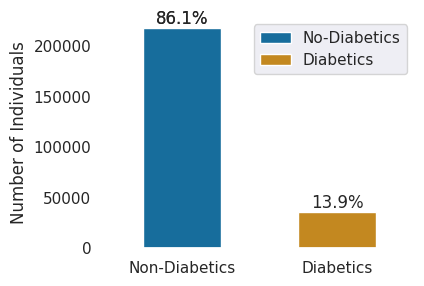

In [ ]:
sns.set(rc={'figure.figsize': (4, 3)})
plt.rcParams['figure.figsize'] = (4, 3)
# Create a count plot

sns.countplot(x='Diabetes_binary', data=df,width=0.5)
# Create a percent plot
total = df['Diabetes_binary'].count()
ax = sns.countplot(x='Diabetes_binary', data=df, hue='Diabetes_binary',palette='colorblind',width=0.5)
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
# Adjust the subplot parameters to make the plots fit next to each other
ax.set_facecolor('white')
plt.subplots_adjust(wspace=0.5)
#plt.title('Distribution of outcome of interest')
plt.legend(['No-Diabetics', 'Diabetics'])
ax.set_ylabel('Number of Individuals')
#ax.set_xlabel('Diabetic Status')
ax.set(xlabel=None)
ax.set_xticks([0,1])
ax.set_xticklabels(['Non-Diabetics', 'Diabetics'])
#plt.subplots_adjust(wspace=0.1)
# Show the plot
plt.show()

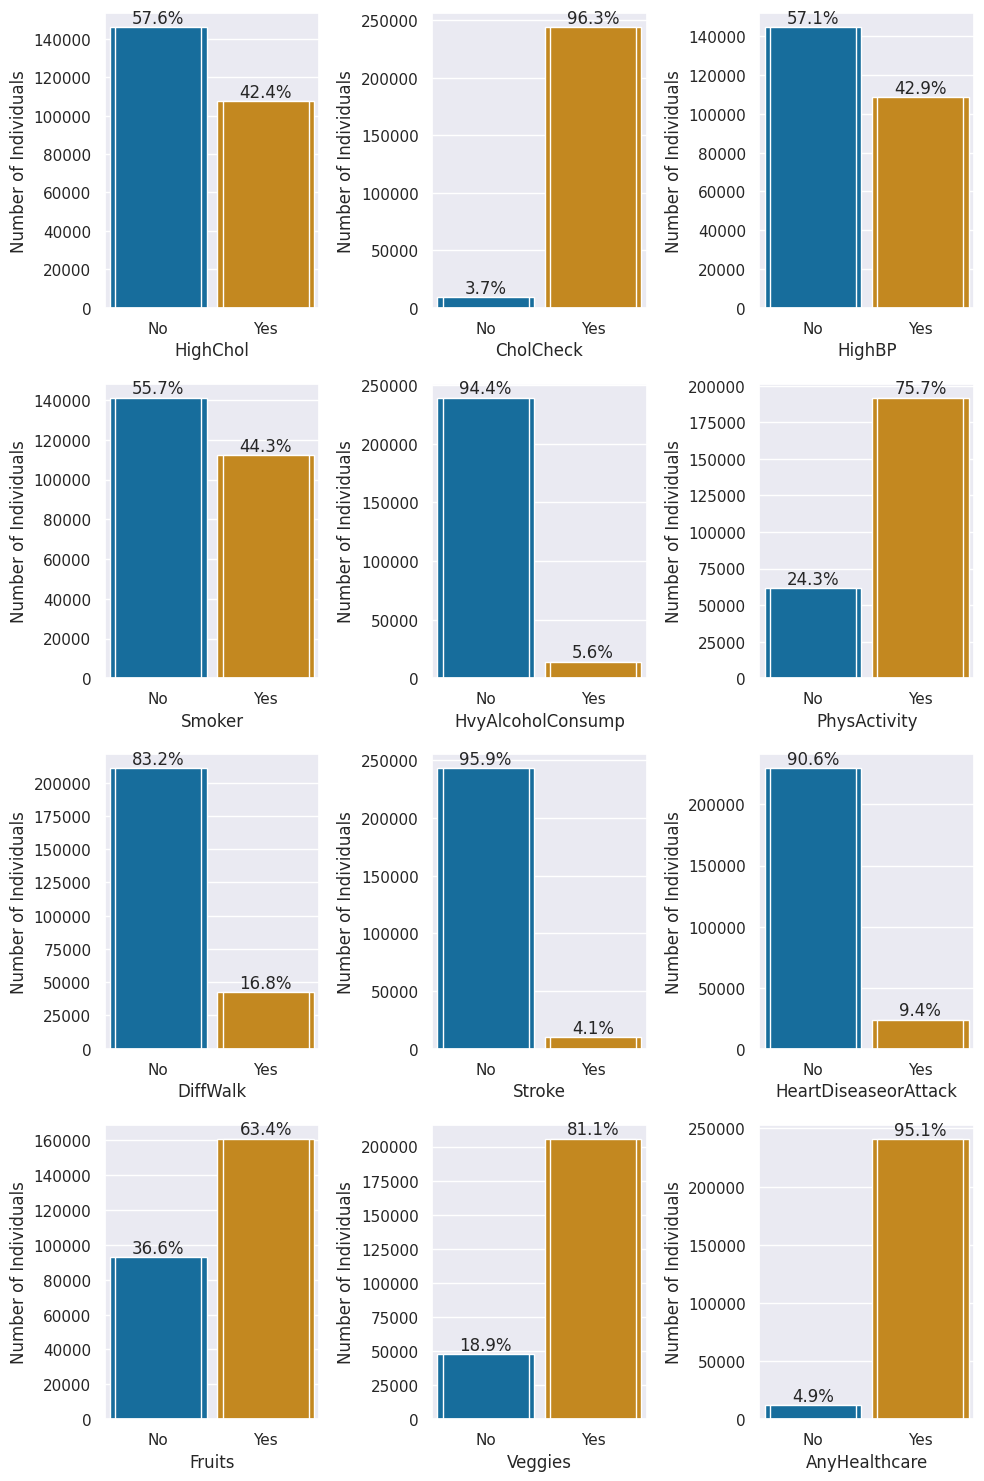

In [ ]:
# Set smaller plot sizes
sns.set(rc={'figure.figsize': (6, 4)})
plt.rcParams['figure.figsize'] = (6, 4)
#Create several bar charts for several important features.
col_names = ['HighChol', 'CholCheck', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk','Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies','AnyHealthcare']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))
for i in range(12):  # Iterate over a range of 12 (4 * 3)
    ax = axes[i//3, i%3]  # Access the current axis
    sns.countplot(data=df, x=col_names[i], ax=ax, width=0.9,hue=col_names[i],palette='colorblind')  # Plot on the current axis
    # Create a percent plot
    total = df[col_names[i]].count()
    ax = sns.countplot(x=col_names[i], data=df, hue=col_names[i],palette='colorblind', ax=ax)
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
    ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total)*100:0.1f}%')
    #ax.set_title(f'Count of {col_names[i]}')
    ax.set_ylabel('Number of Individuals')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['No', 'Yes'])
    ax.get_legend().remove()
    # Remove the legend
#plt.legend().remove()
plt.tight_layout()
display(plt.gcf())  # Display the current plot inline
plt.close()

##**Observation**:

---
We wanted to see whether the dataset is balanced. The outcome variable (the event) has 14% individuals with diabetes. Based on the common practice, this would not consider as a rare event eventhough the individuals with non-diabetes are significantly higher than diabetes.

Overall, the dataset looks fairly balanced, except we have fewer number of individuals with heavy alcohol consumption (6%).


***CATEGORICAL VARIABLES***

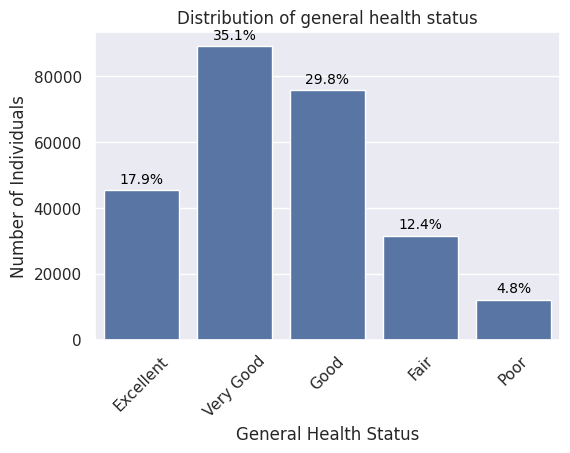

In [ ]:
# Check General health status distribution OVERALL
sns.countplot(data=data, x='GenHlth',  legend=False)
# Get the bar containers
containers = plt.gca().patches

# Add labels to the bars
for container in containers:
    plt.annotate(str(round((container.get_height()/data['GenHlth'].value_counts().sum())*100, 1))+'%', (container.get_x() + container.get_width() / 2, container.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# Set the title and axis labels
plt.title('Distribution of general health status')
plt.xticks([0,1, 2, 3,4], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], rotation = 45)
plt.xlabel('General Health Status')
plt.ylabel('Number of Individuals')
# Display the plot
plt.show()

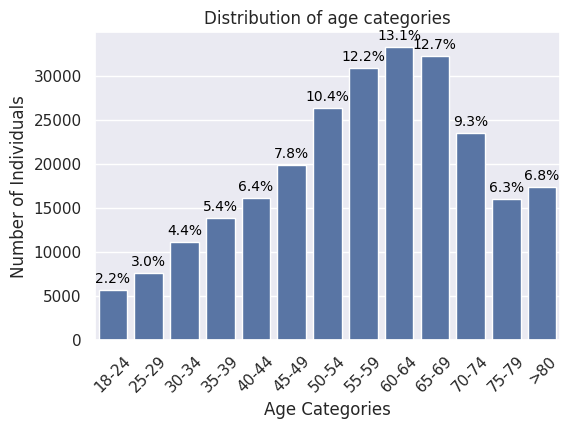

In [ ]:
# Check Age distribution OVERALL
sns.countplot(data=data, x='Age',  legend=False)
# Get the bar containers
containers = plt.gca().patches

# Add labels to the bars
for container in containers:
    plt.annotate(str(round((container.get_height()/data['Age'].value_counts().sum())*100, 1))+'%', (container.get_x() + container.get_width() / 2, container.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# Set the title and axis labels
plt.title('Distribution of age categories')
plt.xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12], ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)
plt.xlabel('Age Categories')
plt.ylabel('Number of Individuals')
# Display the plot
plt.show()

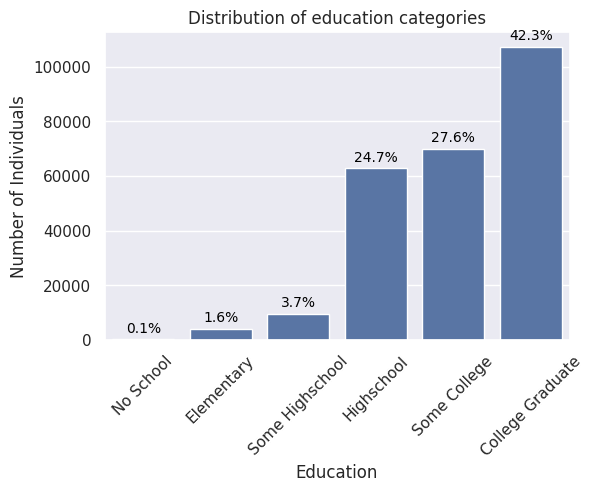

In [ ]:
# Check Education distribution OVERALL
sns.countplot(data=data, x='Education',  legend=False)
# Get the bar containers
containers = plt.gca().patches

# Add labels to the bars
for container in containers:
    plt.annotate(str(round((container.get_height()/data['Education'].value_counts().sum())*100, 1))+'%', (container.get_x() + container.get_width() / 2, container.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# Set the title and axis labels
plt.title('Distribution of education categories')
plt.xticks([0,1, 2, 3,4,5], ['No School', 'Elementary', 'Some Highschool', 'Highschool', 'Some College', 'College Graduate'], rotation = 45)
plt.xlabel('Education')
plt.ylabel('Number of Individuals')
# Display the plot
plt.show()

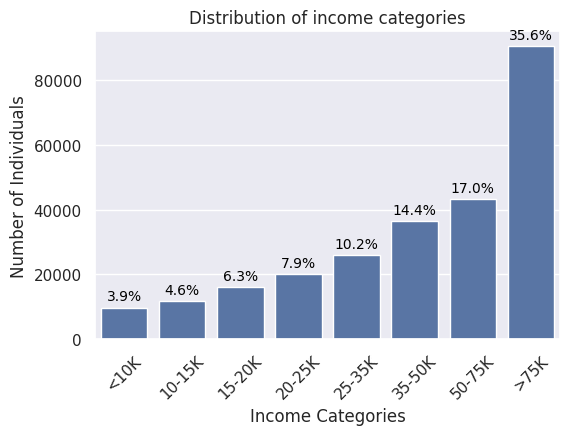

In [ ]:
# Check Income distribution OVERALL
sns.countplot(data=data, x='Income',  legend=False)
# Get the bar containers
containers = plt.gca().patches

# Add labels to the bars
for container in containers:
    plt.annotate(str(round((container.get_height()/data['Income'].value_counts().sum())*100, 1))+'%', (container.get_x() + container.get_width() / 2, container.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# Set the title and axis labels
plt.title('Distribution of income categories')
plt.xticks([0,1, 2, 3,4,5,6,7], ['<10K', '10-15K', '15-20K', '20-25K', '25-35K', '35-50K', '50-75K', '>75K'], rotation = 45)
plt.xlabel('Income Categories')
plt.ylabel('Number of Individuals')
# Display the plot
plt.show()

### <font color='PURPLE'>BI-VARIATE ANALYSES</font>

---


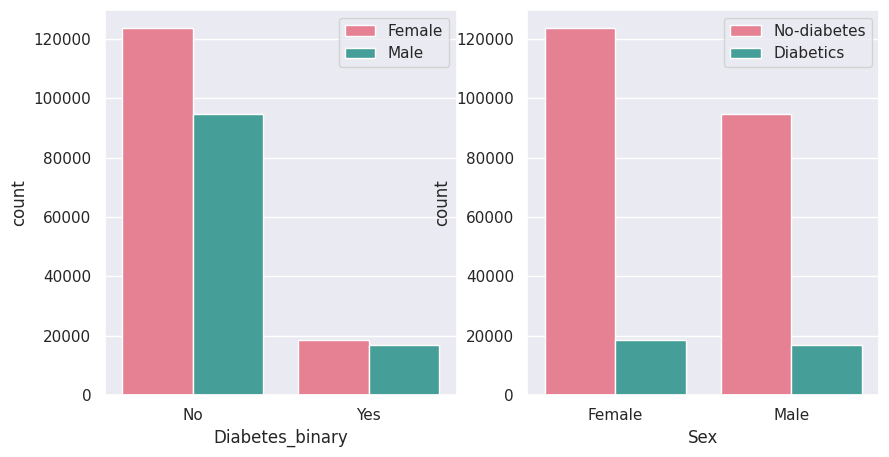

In [ ]:
#Let's plot gender and diabetes distribution.
# Set smaller plot sizes
sns.set(rc={'figure.figsize': (6, 4)})
plt.rcParams['figure.figsize'] = (6, 4)
#Create a blank grid;
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))

#Plot bar chart on each grid;
ax1=sns.countplot(data=df, x='Diabetes_binary', hue='Sex', palette='husl',ax=ax1)
ax1.legend(['Female', 'Male'])
ax1.set_xticks([0,1])
ax1.set_xticklabels(['No', 'Yes'])

ax2=sns.countplot(data=df, x='Sex', hue='Diabetes_binary', palette='husl',ax=ax2)
ax2.legend(['No-diabetes', 'Diabetics'])
ax2.set_xticks([0,1])
ax2.set_xticklabels(['Female', 'Male'])
plt.savefig('Gender.png', bbox_inches = 'tight', dpi=300)
plt.show()

In [ ]:
##Performing the Chi-square test to see the association between gender and outcome of interest.
GenderOutcome = pd.crosstab(df['Diabetes_binary'], df['Sex'])
chi2, p, dof, expected = chi2_contingency(GenderOutcome)
print('Chi-square statistics is %0.3f, p-value is %0.3f' %(chi2, p))
# Interpret the results
if p < 0.05:
    print('There is a statistically significant association between two features.')
else:
    print('There is no statistically significant association between two features.')


Chi-square statistics is 250.414, p-value is 0.000
There is a statistically significant association between two features.


Sex                   0      1
Diabetes_binary               
0                123563  94771
1                 18411  16935
______________________________________________
Sex                      0          1
Diabetes_binary                      
0                56.593568  43.406432
1                52.087931  47.912069


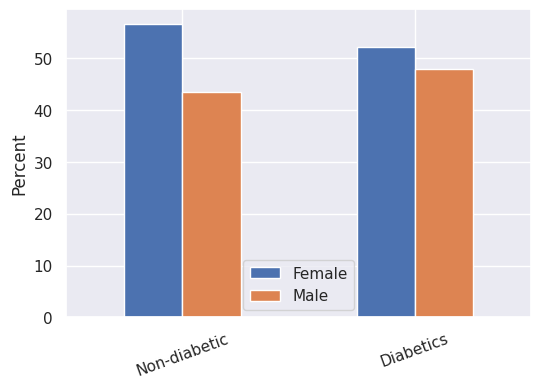

In [ ]:
#Do individuals with diabetes have higher cholesterol? Instead of simply ploting the counts like we did above, let's plot the proportion.
# Create a contingency table
contingency = pd.crosstab(data.Diabetes_binary, data.Sex)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
ax = row_percentages.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['Non-diabetic', 'Diabetics'], rotation=20)
ax.legend(['Female', 'Male'])
#plt.title('High cholesterol proportion across diabetics vs no-diabetes')
ax.set_ylabel('Percent')
plt.savefig('Gender.png', bbox_inches = 'tight', dpi=300)
plt.show()

Diabetes_binary       0      1
Sex                           
0                123563  18411
1                 94771  16935
______________________________________________
Diabetes_binary          0          1
Sex                                  
0                87.032133  12.967867
1                84.839668  15.160332


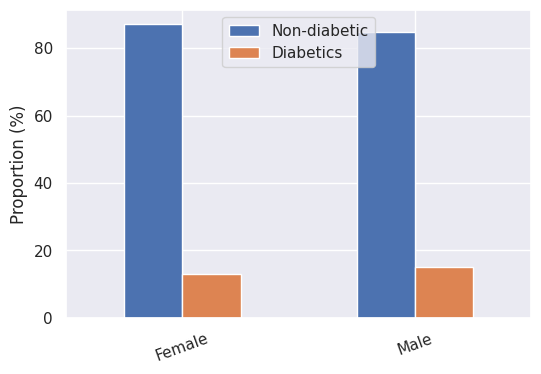

In [ ]:
#Do individuals with diabetes have higher cholesterol? Instead of simply ploting the counts like we did above, let's plot the proportion.
# Create a contingency table
contingency = pd.crosstab(data.Sex, data.Diabetes_binary)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
ax = row_percentages.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['Female', 'Male'], rotation=20)
ax.legend(['Non-diabetic', 'Diabetics'],loc='upper center')
ax.set_ylabel('Proportion (%)')
plt.savefig('Gender.svg', bbox_inches = 'tight', dpi=300)
plt.show()

Diabetes_binary       0      1
Sex                           
0                123563  18411
1                 94771  16935
______________________________________________
Diabetes_binary          0          1
Sex                                  
0                87.032133  12.967867
1                84.839668  15.160332


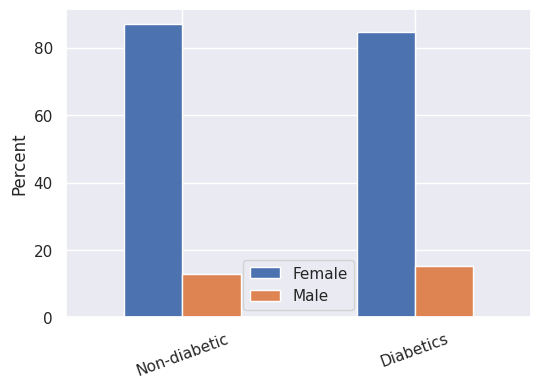

In [ ]:
#Do individuals with diabetes have higher cholesterol? Instead of simply ploting the counts like we did above, let's plot the proportion.
# Create a contingency table
contingency = pd.crosstab(data.Sex, data.Diabetes_binary)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
ax = row_percentages.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['Non-diabetic', 'Diabetics'], rotation=20)
ax.legend(['Female', 'Male'])
#plt.title('High cholesterol proportion across diabetics vs no-diabetes')
ax.set_ylabel('Percent')
plt.savefig('Gender.png', bbox_inches = 'tight', dpi=300)
plt.show()

**Observation**:

---

Both gender are pretty equally vulnerable to the occurance of diabetes.

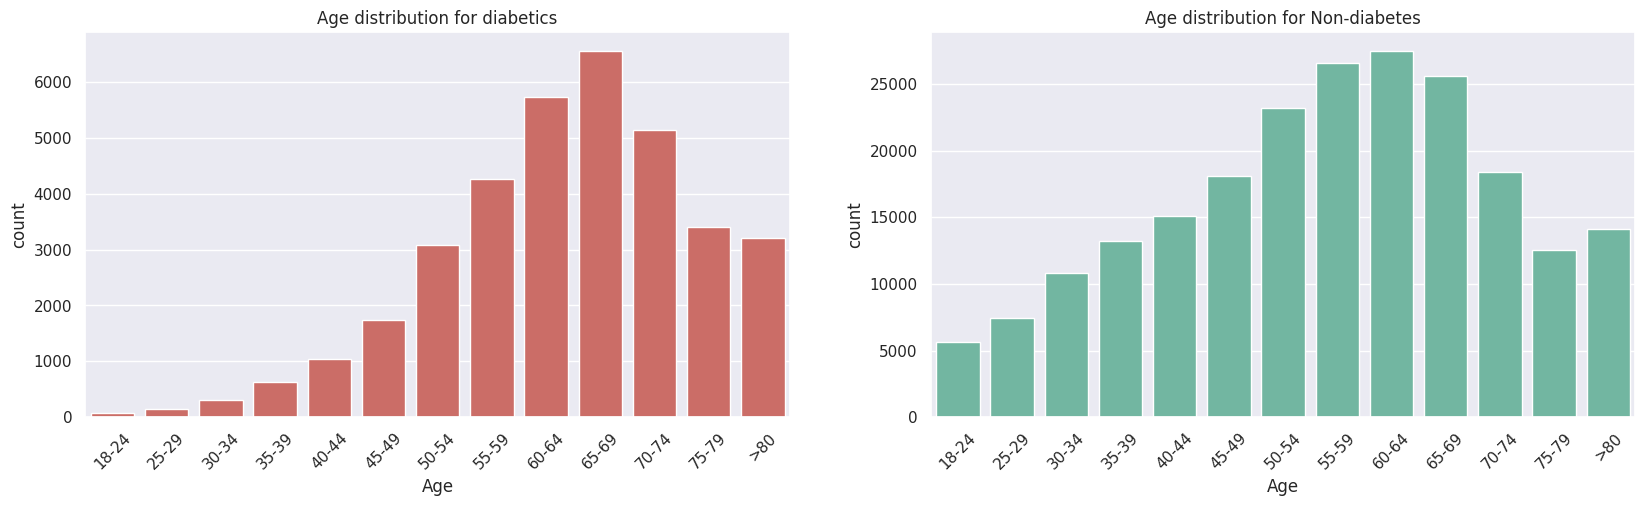

In [ ]:
# Check age and distribution of BMI for people with diabetes and without diabetes
#Create a blank grid;
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(20,5))
#Subset the data with diabetes and non-diabetes.
df_yes = data[data['Diabetes_binary'] == 1]
df_no = data[data['Diabetes_binary'] == 0]

# Create a list of labels for the x-axis ticks
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']

ax1 = sns.countplot(data=df_yes, x='Age', ax=ax1,palette='hls', hue='Diabetes_binary', legend=False)
ax1.set(title= 'Age distribution for diabetics')
ax1.set_xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12])
ax1.set_xticklabels(labels, rotation = 45)

ax2 = sns.countplot(data=df_no, x='Age',ax=ax2,palette='Set2', hue='Diabetes_binary', legend=False)
ax2.set(title= 'Age distribution for Non-diabetes')
ax2.set_xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12])
ax2.set_xticklabels(labels, rotation = 45)
plt.show()


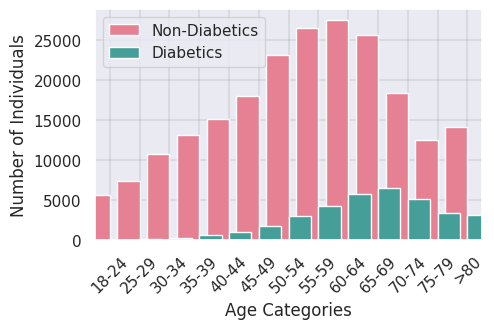

In [ ]:
sns.set(rc={'figure.figsize':(5, 3)})
plt.rcParams['figure.figsize']=(5, 3)

# Create a count plot
# Create a list of labels for the x-axis ticks
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']
Age=sns.countplot(x = 'Age', hue = 'Diabetes_binary', data = data, width=1.5, alpha=1,palette='husl')
Age.set_xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12])
Age.set_xticklabels(labels, rotation = 45)
Age.legend(['Non-Diabetics', 'Diabetics'])
Age.set_xlabel('Age Categories')
Age.set_ylabel('Number of Individuals')

# Set the face color
Age.figure.set_facecolor("White")
Age.grid(True, color='black', linewidth=0.1)

plt.savefig('Age.png', bbox_inches = 'tight', dpi=300)
plt.show()

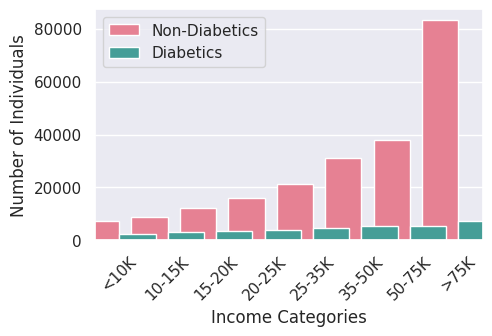

In [ ]:
# Create a list of labels for the x-axis ticks
labels = ['<10K', '10-15K', '15-20K', '20-25K', '25-35K', '35-50K', '50-75K', '>75K']
Income=sns.countplot(x = 'Income', hue = 'Diabetes_binary', data = data, width=1.5, alpha=1,palette='husl')
Income.set_xticks([0,1, 2, 3,4,5,6,7])
Income.set_xticklabels(labels, rotation = 45)
# Center the x-axis tick labels
Income.set_xticklabels(Income.get_xticklabels(), ha='center')
Income.legend(['Non-Diabetics', 'Diabetics'])
Income.set_xlabel('Income Categories')
Income.set_ylabel('Number of Individuals')
plt.savefig('Income.png', bbox_inches = 'tight', dpi=300)
plt.show()

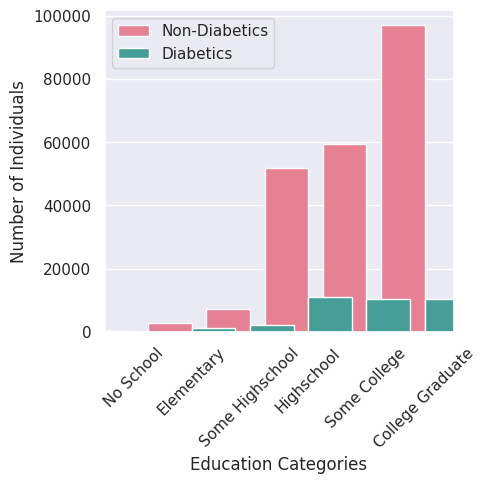

In [ ]:
sns.set(rc={'figure.figsize':(5, 5)})
plt.rcParams['figure.figsize']=(5, 5)
# Create a count plot
# Create a list of labels for the x-axis ticks
labels = ['No School', 'Elementary', 'Some Highschool', 'Highschool', 'Some College', 'College Graduate']
Edu=sns.countplot(x = 'Education', hue = 'Diabetes_binary', data = data, width=1.5,alpha=1,palette='husl')
Edu.set_xticks([0,1,2,3,4,5])
Edu.set_xticklabels(labels, rotation = 45)
# Center the x-axis tick labels
Edu.set_xticklabels(Edu.get_xticklabels(), ha='center')
Edu.legend(['Non-Diabetics', 'Diabetics'])
Edu.set_xlabel('Education Categories')
Edu.set_ylabel('Number of Individuals')
# Adjust the plot
plt.tight_layout()
plt.savefig('Education.png', bbox_inches = 'tight', dpi=300)
plt.show()

In [ ]:
##Performing the Chi-square test to see the association between Age and outcome of interest.
AgeOutcome = pd.crosstab(data['Diabetes_binary'], data['Age'])
chi2, p, dof, expected = chi2_contingency(AgeOutcome)
print('Chi-square statistics is %0.3f, p-value is %0.3f' %(chi2, p))
# Interpret the results
if p < 0.05:
    print('There is a statistically significant association between age and diabetic status.')
else:
    print('There is no statistically significant association between age and diabetic status.')

Chi-square statistics is 8795.051, p-value is 0.000
There is a statistically significant association between age and diabetic status.


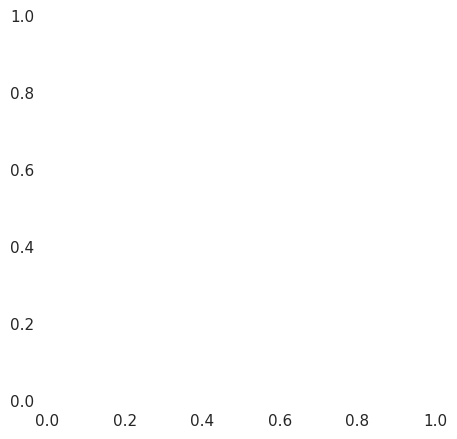

In [ ]:
#plt.rcParams['axes.facecolor'] = 'white'
# Enable the grid
#plt.grid(True, color='white', linewidth=0.1)

In [ ]:
plt.rcParams['axes.grid'] = True  # Turn off the grid for all plots

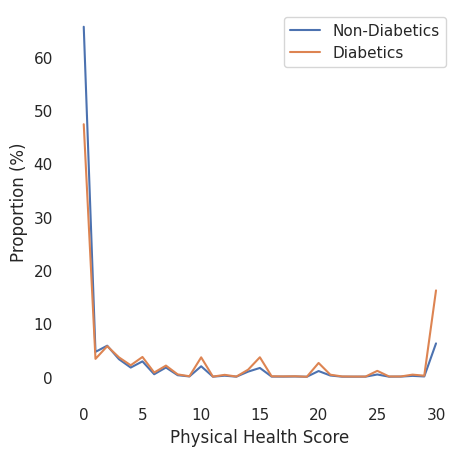

In [ ]:
# Create a crosstab
ct = pd.crosstab(data.Diabetes_binary, data.PhysHlth, normalize='index')

# Multiply all columns by 100
ct_scaled = ct * 100

# Use the column names as x-axis labels
column_names = ct.columns
x_labels = column_names

plt.plot(x_labels, ct_scaled.iloc[0], label=column_names[0])
plt.plot(x_labels, ct_scaled.iloc[1], label=column_names[1])
# Complete the plot
plt.xlabel('Physical Health Score')
plt.ylabel('Proportion (%)')

# Add legend
plt.legend(['Non-Diabetics', 'Diabetics'])
plt.savefig('PhysHlth.svg', bbox_inches = 'tight', dpi=300)
plt.show()

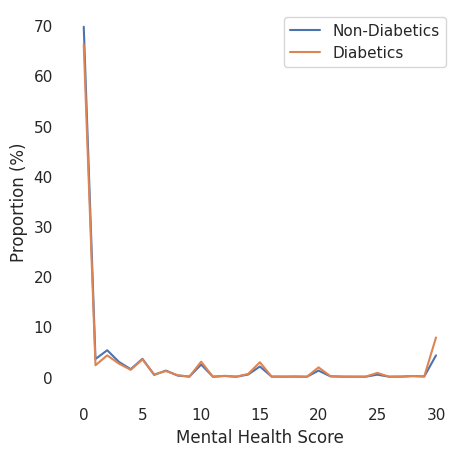

In [ ]:
# Create a crosstab
ct = pd.crosstab(data.Diabetes_binary, data.MentHlth, normalize='index')

# Multiply all columns by 100
ct_scaled = ct * 100
# Use the column names as x-axis labels
column_names = ct.columns
x_labels = column_names

plt.plot(x_labels, ct_scaled.iloc[0], label=column_names[0])
plt.plot(x_labels, ct_scaled.iloc[1], label=column_names[1])
# Complete the plot
plt.xlabel('Mental Health Score')
plt.ylabel('Proportion (%)')
# Add legend
plt.legend(['Non-Diabetics', 'Diabetics'])
plt.savefig('MentHlth.svg', bbox_inches = 'tight', dpi=300)
plt.show()

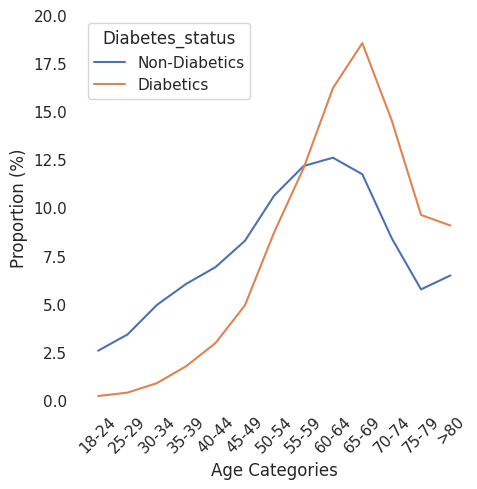

In [ ]:
# Create a crosstab
ct = pd.crosstab(data.Diabetes_binary, data.Age, normalize='index')

# Multiply all columns by 100
ct_scaled = ct * 100

# Convert the cross tab into a dataframe
df_dt = ct_scaled.stack().to_frame()

# Set the index and columns of the dataframe
df_dt.index = df_dt.index.set_names(['Diabetes_binary', 'column'])
df_dt.columns = ['value']

# Add the 'y' column to the DataFrame
df_dt['y'] = df_dt['value']

# Add the 'Diabetes_binary' column to the DataFrame
df_dt['Diabetes_status'] = df_dt.index.get_level_values(0)
# Replace 0 with "Female" and 1 with "Male"
df_dt['Diabetes_status'] = df_dt['Diabetes_status'].replace({0: "Non-Diabetics", 1: "Diabetics"})

# Create a line plot for each group
test=sns.lineplot(x="column", y="y", hue="Diabetes_status", data=df_dt,legend=True)
plt.ylim(0, 20)
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']
test.set_xticks([1, 2, 3,4,5,6,7,8,9,10,11,12,13])
test.set_xticklabels(labels, rotation = 45)

# Complete the plot
plt.xlabel('Age Categories')
plt.ylabel('Proportion (%)')
# Add legend
#plt.legend(title='Diabetes Status', loc='upper left', labels=['Non-Diabetics', 'Diabetics'])
#plt.legend(['Non-Diabetics', 'Diabetics'])
plt.savefig('Age.svg', bbox_inches = 'tight', dpi=300)
plt.show()

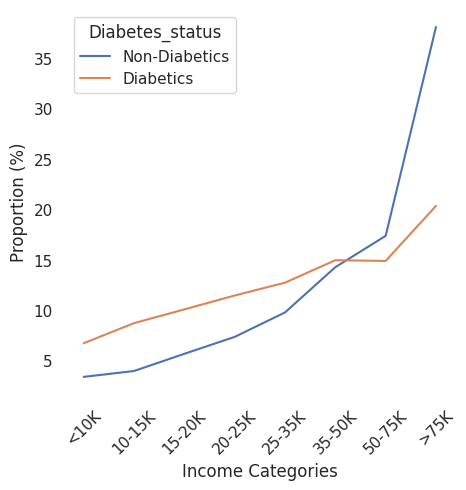

In [ ]:
# Create a crosstab
ct = pd.crosstab(data.Diabetes_binary, data.Income, normalize='index')

# Multiply all columns by 100
ct_scaled = ct * 100

# Convert the cross tab into a dataframe
df_dt = ct_scaled.stack().to_frame()

# Set the index and columns of the dataframe
df_dt.index = df_dt.index.set_names(['Diabetes_binary', 'column'])
df_dt.columns = ['value']

# Add the 'y' column to the DataFrame
df_dt['y'] = df_dt['value']

# Add the 'Diabetes_binary' column to the DataFrame
df_dt['Diabetes_status'] = df_dt.index.get_level_values(0)
# Replace 0 with "Female" and 1 with "Male"
df_dt['Diabetes_status'] = df_dt['Diabetes_status'].replace({0: "Non-Diabetics", 1: "Diabetics"})

# Create a line plot for each group
test=sns.lineplot(x="column", y="y", hue="Diabetes_status", data=df_dt,legend=True)

labels = ['<10K', '10-15K', '15-20K', '20-25K', '25-35K', '35-50K', '50-75K', '>75K']
test.set_xticks([1, 2, 3,4,5,6,7,8])
test.set_xticklabels(labels, rotation = 45)

# Complete the plot
plt.xlabel('Income Categories')
plt.ylabel('Proportion (%)')
# Add legend
#plt.legend(title='Diabetes Status', loc='upper left', labels=['Non-Diabetics', 'Diabetics'])
#plt.legend(['Non-Diabetics', 'Diabetics'])
plt.savefig('Income.svg', bbox_inches = 'tight', dpi=300)
plt.show()

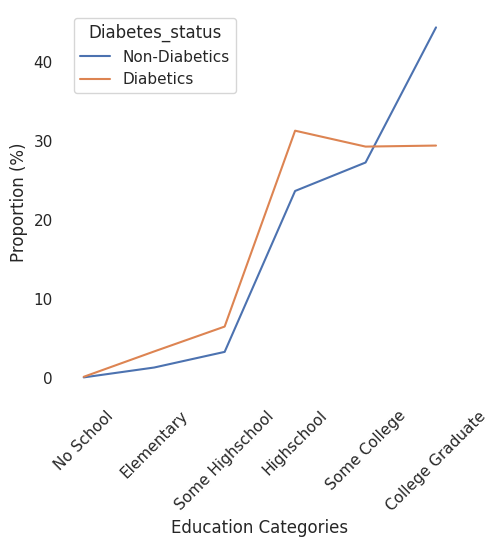

In [ ]:
# Create a crosstab
ct = pd.crosstab(data.Diabetes_binary, data.Education, normalize='index')

# Multiply all columns by 100
ct_scaled = ct * 100

# Convert the cross tab into a dataframe
df_dt = ct_scaled.stack().to_frame()

# Set the index and columns of the dataframe
df_dt.index = df_dt.index.set_names(['Diabetes_binary', 'column'])
df_dt.columns = ['value']

# Add the 'y' column to the DataFrame
df_dt['y'] = df_dt['value']

# Add the 'Diabetes_binary' column to the DataFrame
df_dt['Diabetes_status'] = df_dt.index.get_level_values(0)
# Replace 0 with "Female" and 1 with "Male"
df_dt['Diabetes_status'] = df_dt['Diabetes_status'].replace({0: "Non-Diabetics", 1: "Diabetics"})

# Create a line plot for each group
test=sns.lineplot(x="column", y="y", hue="Diabetes_status", data=df_dt,legend=True)

labels = ['No School', 'Elementary', 'Some Highschool', 'Highschool', 'Some College', 'College Graduate']
test.set_xticks([1, 2, 3,4,5,6])
test.set_xticklabels(labels, rotation = 45)

# Complete the plot
plt.xlabel('Education Categories')
plt.ylabel('Proportion (%)')
# Add legend
#plt.legend(title='Diabetes Status', loc='upper left', labels=['Non-Diabetics', 'Diabetics'])
#plt.legend(['Non-Diabetics', 'Diabetics'])
plt.savefig('Education.svg', bbox_inches = 'tight', dpi=300)
plt.show()

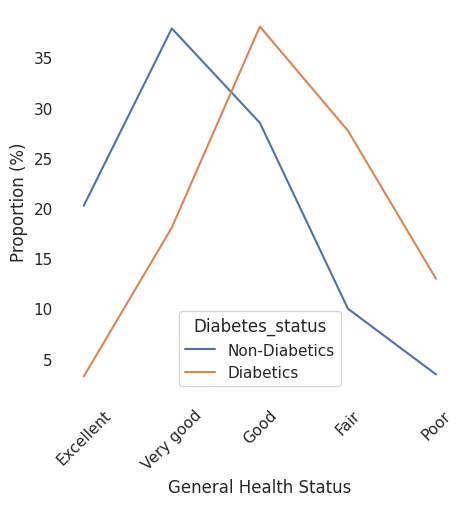

In [ ]:
# Create a crosstab
ct = pd.crosstab(data.Diabetes_binary, data.GenHlth, normalize='index')

# Multiply all columns by 100
ct_scaled = ct * 100

# Convert the cross tab into a dataframe
df_dt = ct_scaled.stack().to_frame()

# Set the index and columns of the dataframe
df_dt.index = df_dt.index.set_names(['Diabetes_binary', 'column'])
df_dt.columns = ['value']

# Add the 'y' column to the DataFrame
df_dt['y'] = df_dt['value']

# Add the 'Diabetes_binary' column to the DataFrame
df_dt['Diabetes_status'] = df_dt.index.get_level_values(0)
# Replace 0 with "Female" and 1 with "Male"
df_dt['Diabetes_status'] = df_dt['Diabetes_status'].replace({0: "Non-Diabetics", 1: "Diabetics"})

# Create a line plot for each group
test=sns.lineplot(x="column", y="y", hue="Diabetes_status", data=df_dt,legend=True)

labels = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
test.set_xticks([1, 2, 3,4,5])
test.set_xticklabels(labels, rotation = 45)

# Complete the plot
plt.xlabel('General Health Status')
plt.ylabel('Proportion (%)')
# Add legend
#plt.legend(title='Diabetes Status', loc='upper left', labels=['Non-Diabetics', 'Diabetics'])
#plt.legend(['Non-Diabetics', 'Diabetics'])
plt.savefig('GenHlth.svg', bbox_inches = 'tight', dpi=300)
plt.show()

**Observation**:

---


Number of diabetes patients are higher in the age group 60+. It also tells us that individuals are likely to experience diabetes once they cross 60 years of age.

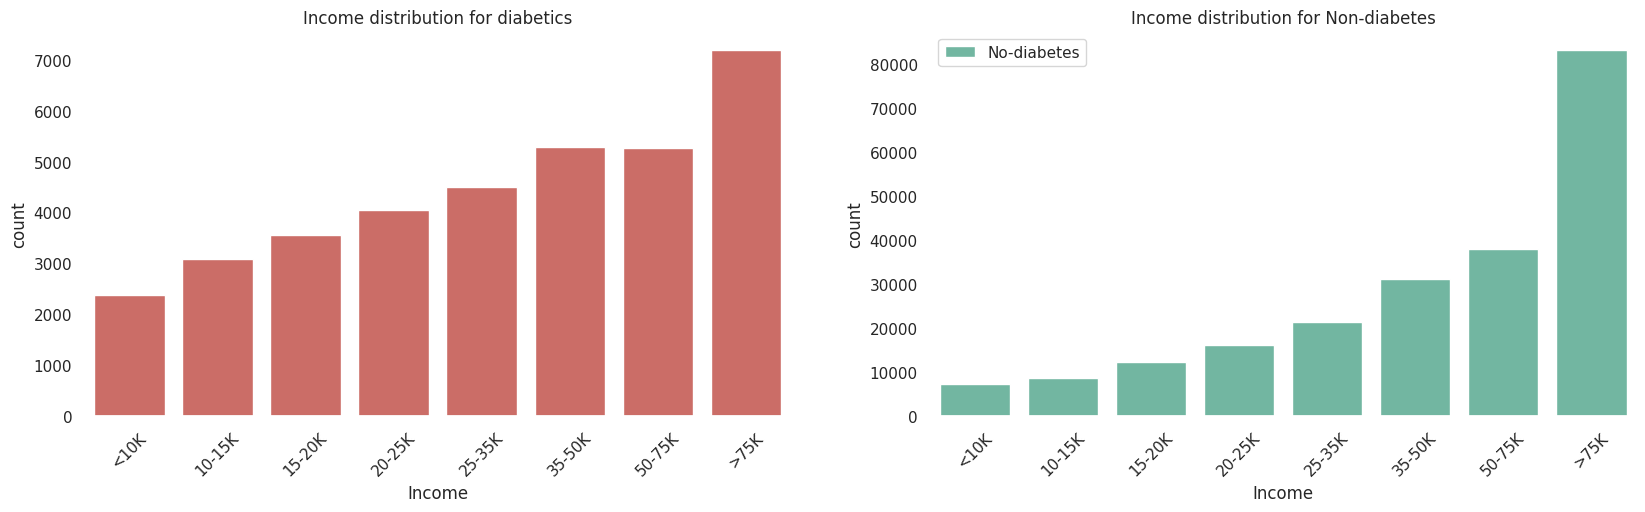

In [ ]:
# Check Income distribution for people with diabetes and without diabetes
#Create a blank grid;
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(20,5))
#Subset the data with diabetes and non-diabetes.
df_yes = data[data['Diabetes_binary'] == 1]
df_no = data[data['Diabetes_binary'] == 0]

# Create a list of labels for the x-axis ticks
labels = ['<10K', '10-15K', '15-20K', '20-25K', '25-35K', '35-50K', '50-75K', '>75K']

ax1 = sns.countplot(data=df_yes, x='Income', ax=ax1,palette='hls', hue='Diabetes_binary', legend=False)
ax1.set(title= 'Income distribution for diabetics')
ax1.set_xticks([0,1,2,3,4,5,6,7])
ax1.set_xticklabels(labels, rotation = 45)

ax2 = sns.countplot(data=df_no, x='Income',ax=ax2,palette='Set2', hue='Diabetes_binary', legend=False)
ax2.set(title= 'Income distribution for Non-diabetes')
ax2.set_xticks([0,1,2,3,4,5,6,7])
ax2.set_xticklabels(labels, rotation = 45)

plt.grid()
plt.legend(['No-diabetes', 'Diabetics'])
plt.show()


In [ ]:
##Performing the Chi-square test to see the association between Income and outcome of interest.
IncOutcome = pd.crosstab(data['Diabetes_binary'], data['Income'])
chi2, p, dof, expected = chi2_contingency(IncOutcome)
print('Chi-square statistics is %0.3f, p-value is %0.3f' %(chi2, p))
# Interpret the results
if p < 0.05:
    print('There is a statistically significant association between income and diabetic status.')
else:
    print('There is no statistically significant association between income and diabetic status.')

Chi-square statistics is 7003.715, p-value is 0.000
There is a statistically significant association between income and diabetic status.


**Observation**:

---


 Individuals with diabetes have significantly less income than
the non-diabetes individuals.

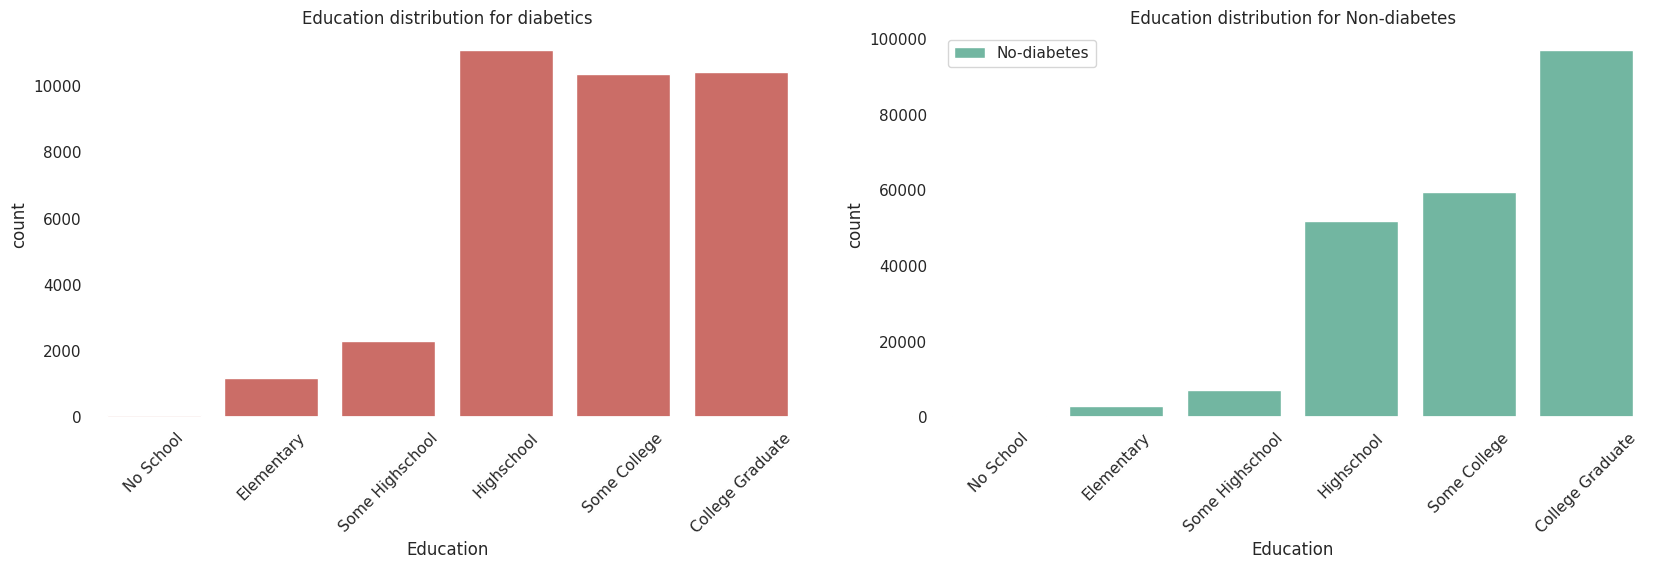

In [ ]:
# Check Education distribution for people with diabetes and without diabetes
#Create a blank grid;
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(20,5))
#Subset the data with diabetes and non-diabetes.
df_yes = data[data['Diabetes_binary'] == 1]
df_no = data[data['Diabetes_binary'] == 0]

# Create a list of labels for the x-axis ticks
labels = ['No School', 'Elementary', 'Some Highschool', 'Highschool', 'Some College', 'College Graduate']

ax1 = sns.countplot(data=df_yes, x='Education', ax=ax1,palette='hls', hue='Diabetes_binary', legend=False)
ax1.set(title= 'Education distribution for diabetics')
ax1.set_xticks([0,1, 2, 3,4,5])
ax1.set_xticklabels(labels, rotation = 45)

ax2 = sns.countplot(data=df_no, x='Education',ax=ax2,palette='Set2', hue='Diabetes_binary', legend=False)
ax2.set(title= 'Education distribution for Non-diabetes')
ax2.set_xticks([0,1, 2, 3,4,5])
ax2.set_xticklabels(labels, rotation = 45)


plt.grid()
plt.legend(['No-diabetes', 'Diabetics'])
plt.show()

In [ ]:
##Performing the Chi-square test to see the association between Education and outcome of interest.
EduOutcome = pd.crosstab(data['Diabetes_binary'], data['Education'])
chi2, p, dof, expected = chi2_contingency(EduOutcome)
print('Chi-square statistics is %0.3f, p-value is %0.3f' %(chi2, p))
# Interpret the results
if p < 0.05:
    print('There is a statistically significant association between Education and diabetic status.')
else:
    print('There is no statistically significant association between Education and diabetic status.')

Chi-square statistics is 4027.112, p-value is 0.000
There is a statistically significant association between Education and diabetic status.


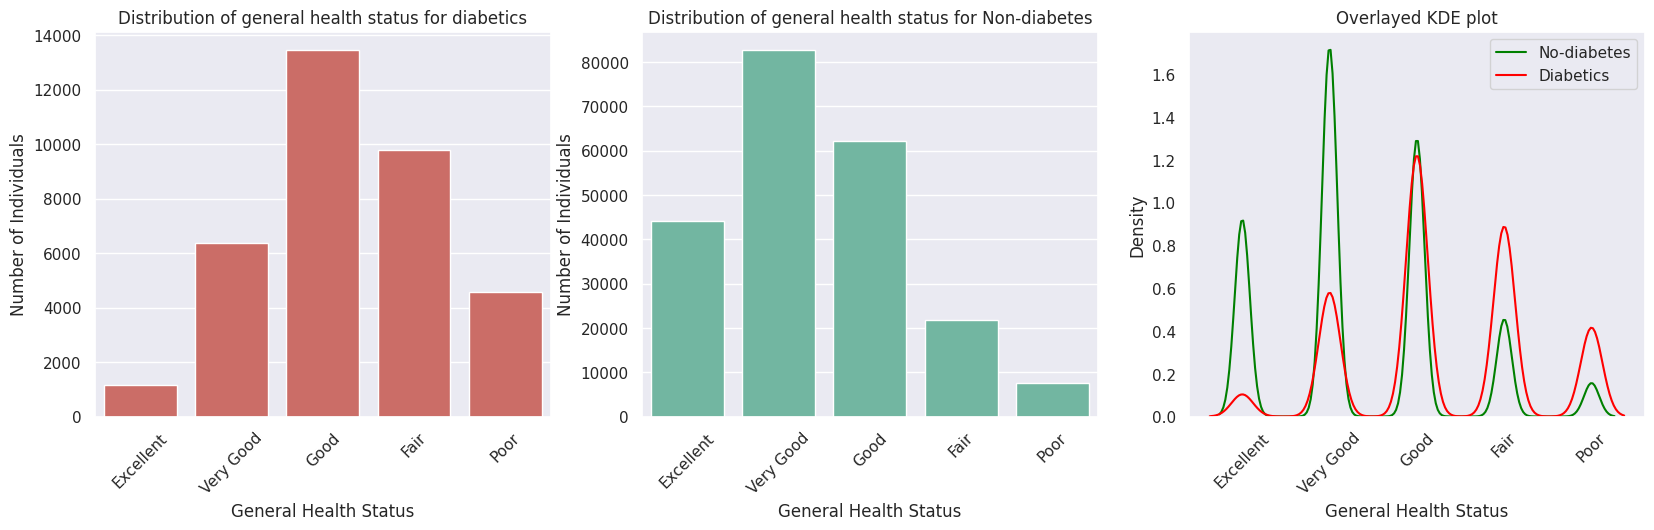

In [ ]:
# Check General health status distribution for people with diabetes and without diabetes
# Set smaller plot sizes
sns.set(rc={'figure.figsize': (6, 4)})
plt.rcParams['figure.figsize'] = (6, 4)
#Create a blank grid;
data['GenHlth'] = data['GenHlth'].astype('category').cat.codes
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(20,5))
#Subset the data with diabetes and non-diabetes.
df_yes = data[data['Diabetes_binary'] == 1]
df_no = data[data['Diabetes_binary'] == 0]

# Create a list of labels for the x-axis ticks
labels = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

ax1 = sns.countplot(data=df_yes, x='GenHlth', ax=ax1,palette='hls', hue='Diabetes_binary', legend=False)
ax1.set(title= 'Distribution of general health status for diabetics')
ax1.set_xticks([0,1, 2, 3,4])
ax1.set_xticklabels(labels, rotation = 45)
ax1.set_xlabel('General Health Status')
ax1.set_ylabel('Number of Individuals')


ax2 = sns.countplot(data=df_no, x='GenHlth',ax=ax2,palette='Set2', hue='Diabetes_binary', legend=False)
ax2.set(title= 'Distribution of general health status for Non-diabetes')
ax2.set_xticks([0,1, 2, 3,4])
ax2.set_xticklabels(labels, rotation = 45)
ax2.set_xlabel('General Health Status')
ax2.set_ylabel('Number of Individuals')

ax3=sns.kdeplot(data[data['Diabetes_binary'] == 0] ['GenHlth'],color='green')
ax3=sns.kdeplot(data[data['Diabetes_binary'] == 1] ['GenHlth'],color='red')
ax3.set_xlabel('General Health Status')
plt.grid()
plt.title('Overlayed KDE plot')
plt.legend(['No-diabetes', 'Diabetics'])
ax3.set_xticks([0,1, 2, 3,4])
ax3.set_xticklabels(labels, rotation = 45)
plt.show()

In [ ]:
##Performing the Chi-square test to see the association between Gen Health and outcome of interest.
GHOutcome = pd.crosstab(data['Diabetes_binary'], data['GenHlth'])
chi2, p, dof, expected = chi2_contingency(GHOutcome)
print('Chi-square statistics is %0.3f, p-value is %0.3f' %(chi2, p))
# Interpret the results
if p < 0.05:
    print('There is a statistically significant association between Gen Health and diabetic status.')
else:
    print('There is no statistically significant association between Gen Health and diabetic status.')

Chi-square statistics is 22728.069, p-value is 0.000
There is a statistically significant association between Gen Health and diabetic status.


**Observation**:

---

Higher number of individuals with diabetes only have highschool or less education; whereas, higher number of non-diabetes individuals have some college or above.

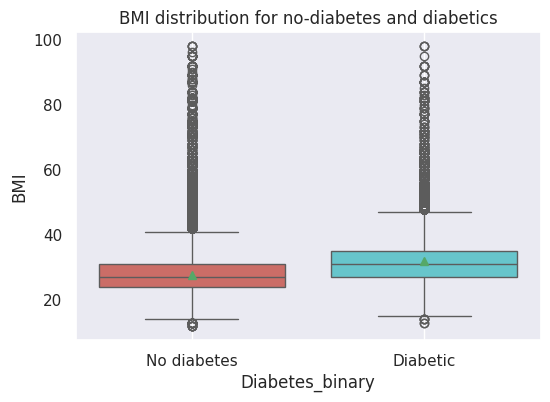

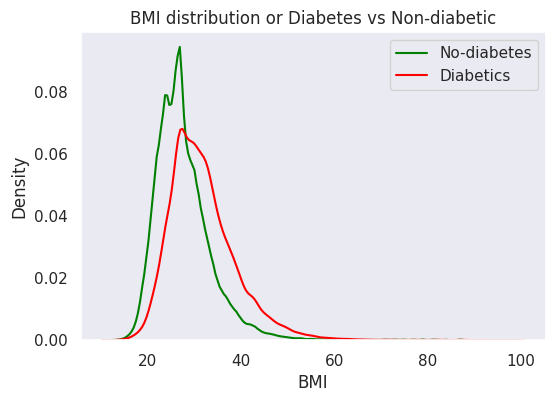

In [ ]:
# Compare BMI for people with and without diabetes
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI',palette='hls', hue='Diabetes_binary', legend=False,showmeans=True)
ax.set(title = 'BMI distribution for no-diabetes and diabetics')
ax.set_xticks([0,1])
plt.grid()
ax.set_xticklabels(['No diabetes', 'Diabetic'])
#plt.ylim(10, 70)
#I limited the BMI just to have a better visualization.
plt.show()

# Check visually how BMI distribution looks like using overlaying KDE plots.
sns.kdeplot(df[df['Diabetes_binary'] == 0] ['BMI'],color='green')
sns.kdeplot(df[df['Diabetes_binary'] == 1] ['BMI'],color='red')
plt.grid()
plt.title('BMI distribution or Diabetes vs Non-diabetic')
plt.legend(['No-diabetes', 'Diabetics'])
plt.show()

In [ ]:
from scipy.stats import ttest_ind
# Calculate the t-statistic and p-value
t, p = ttest_ind(df['BMI'][df['Diabetes_binary'] == 1], df['BMI'][df['Diabetes_binary'] == 0])

# Print the results
print('t-statistic:', t)
print('p-value:', p)
if p < 0.05:
    print('There is a statistically significant difference in mean BMI between diabetic vs non-diabetic individuals.')
else:
    print('There is no statistically significant difference in mean BMI between diabetic vs non-diabetic individuals.')

t-statistic: 111.87814193117426
p-value: 0.0
There is a statistically significant difference in mean BMI between diabetic vs non-diabetic individuals.


**Observations**:

---
People with diabetes have higher BMI compared to non-diabetic individuals.


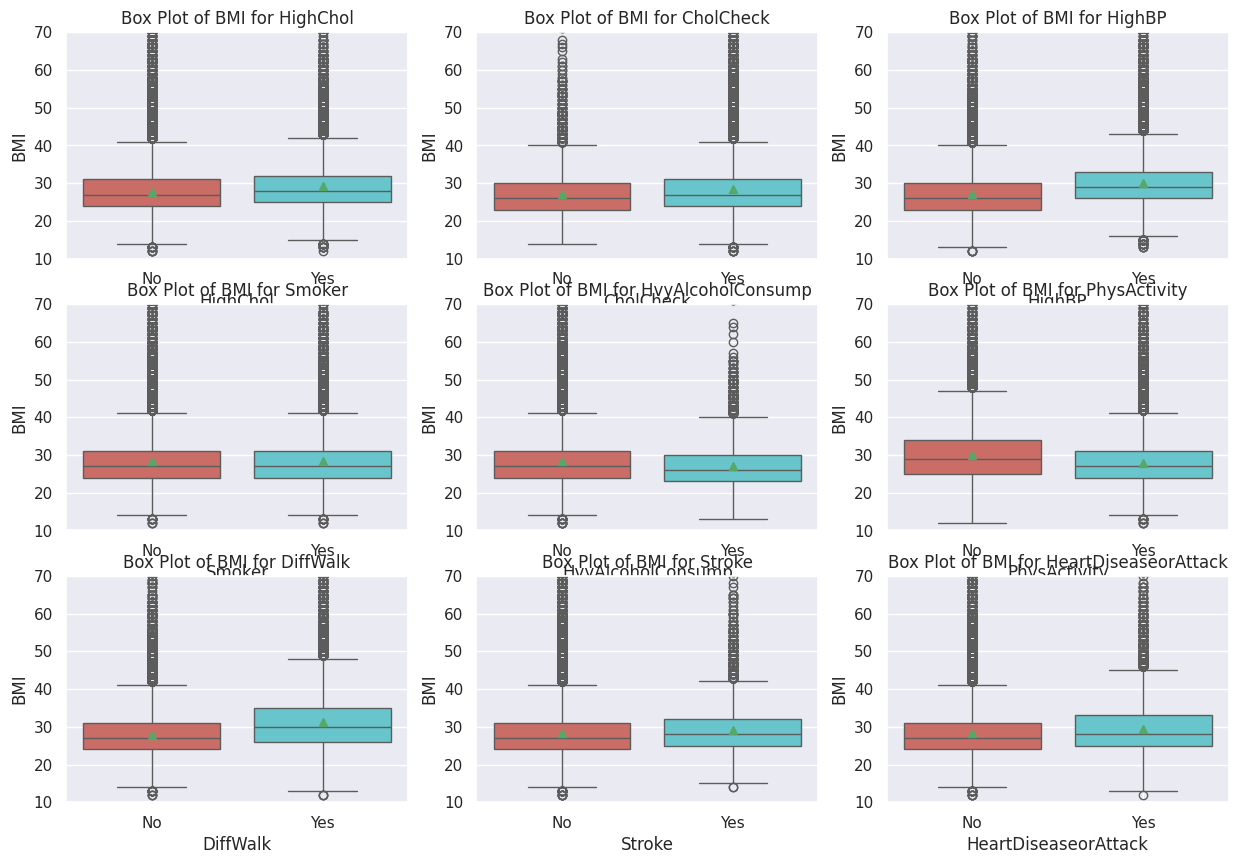

In [ ]:
#Let's also plot some other binary  variables against the BMI. We will list several binary variables and create several box plots on go.

binary_variables = ['HighChol', 'CholCheck', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk','Stroke', 'HeartDiseaseorAttack']
# Create a figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Create a loop to iterate over the binary variables
for i, binary_variable in enumerate(binary_variables):
    # Create a box plot of BMI for the binary variable
    ax=sns.boxplot(x=binary_variable,y='BMI',showmeans=True,data=df,palette='hls', hue=binary_variable, legend=False, ax=axes[i // 3, i % 3])
    plt.grid(True)
    # Add a title to the box plot
    axes[i // 3, i % 3].set_title('Box Plot of BMI for {}'.format(binary_variable))
    ax.set_xticks([0,1])
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_ylim([10, 70]) #Setting Ylim to have better visualization.
# Show the box plots
plt.show()

NOTE: The above plot needs work to make the visualization better.

**Observations**:

---

1. Individuals with high cholesterol have higher BMI.
2. Individuals who checked cholesterol level in the last 5 years have higher BMI. This sounds odd, but this makes sense. Individuals who have not had anby cholesterol check in the last 5 years are less likely to have their BMI checked.
3. Individuals with high BP have higher BMI.
4. BMI has nothing to do with smoking habit. In other words, both smokers and non-smokers have the same average BMI.
5. Individuals who **DO NOT** consume alcohol alot have higher BMI.
6. Individuals with less physical activities have higher BMI.
7. Individuals with difficulties in walking have higher BMI.
8. Individuals with the risk of heart attack have higher BMI.

All the above observations make sense except number 5.


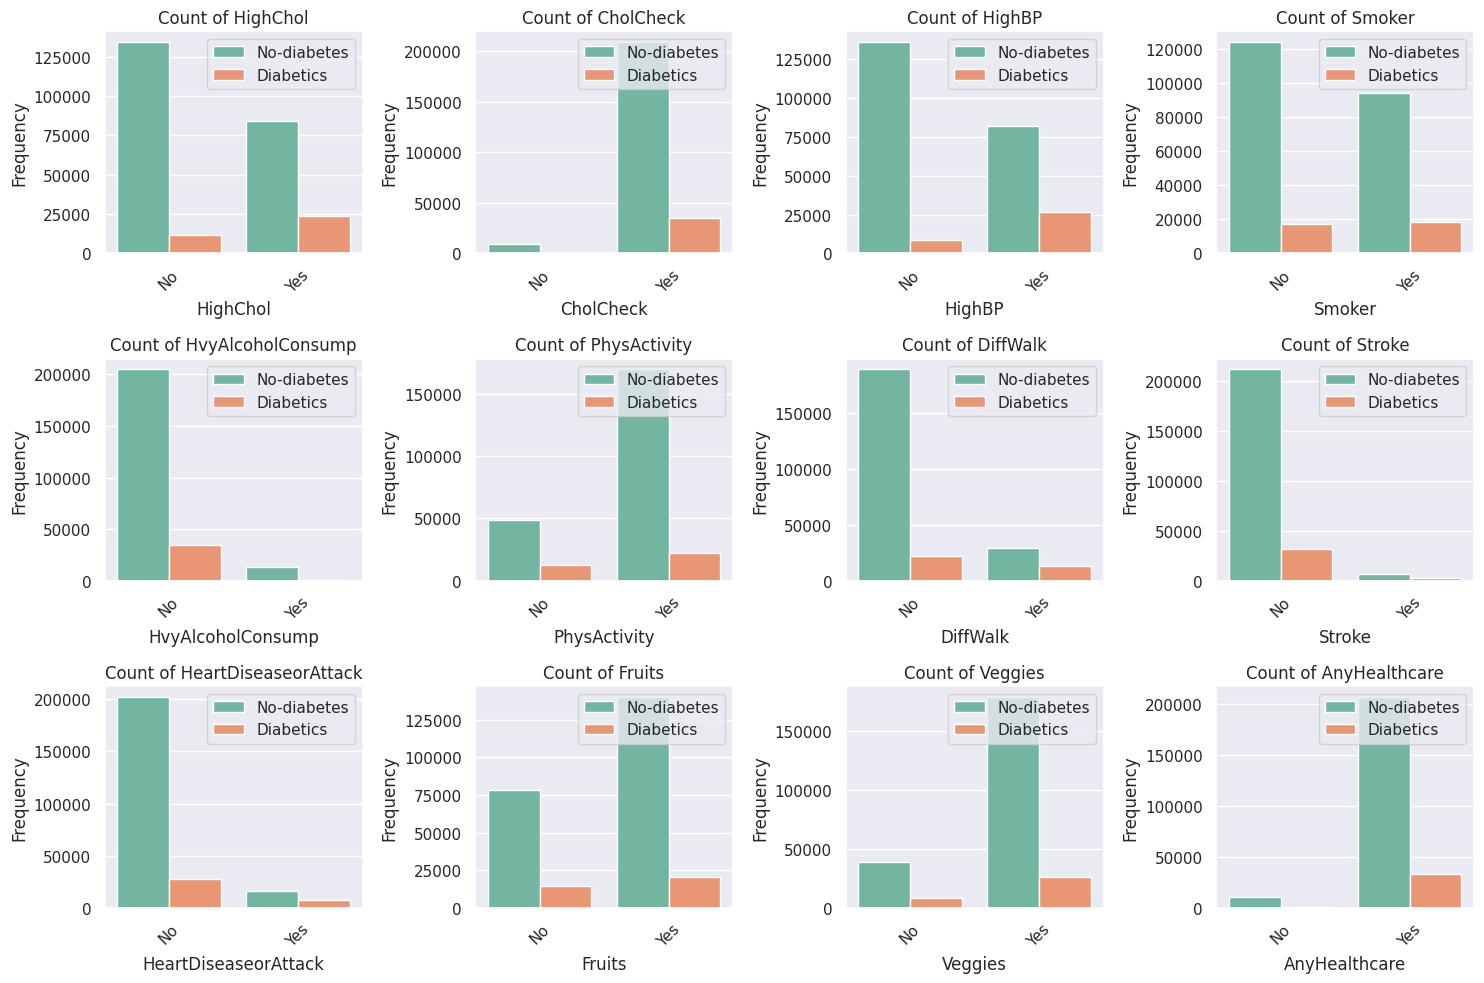

In [ ]:
#Create several bar charts comparing selected features for diabetic vs non-diabetic individuals.
col_names = ['HighChol', 'CholCheck', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk','Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies','AnyHealthcare']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(col_names):
    ax = axes[i//4, i%4]  # Access the current axis
    sns.countplot(data=df, x=col, ax=ax,hue='Diabetes_binary',palette='Set2')  # Plot on the current axis
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend(['No-diabetes', 'Diabetics'])
    ax.set_xticks([0,1])
    ax.set_xticklabels(['No', 'Yes'])
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
display(plt.gcf())  # Display the current plot inline
plt.close()  # Close the plot to avoid duplicate display

Diabetes_binary       0      1
HighChol                      
0                134429  11660
1                 83905  23686
______________________________________________
Diabetes_binary          0          1
HighChol                             
0                92.018564   7.981436
1                77.985147  22.014853


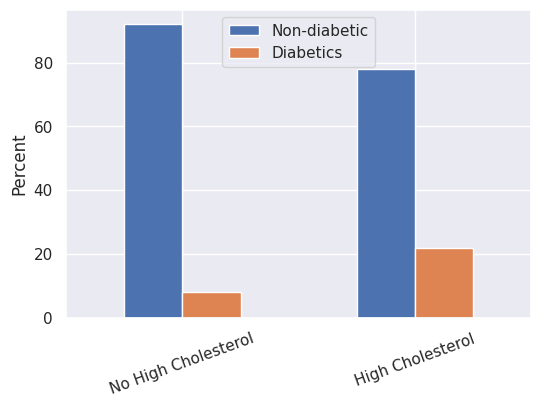

In [ ]:
#Do individuals with diabetes have higher cholesterol? Instead of simply ploting the counts like we did above, let's plot the proportion.
# Create a contingency table
contingency = pd.crosstab(data.HighChol, data.Diabetes_binary)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
fig1 = row_percentages.plot(kind='bar')
fig1.set(xlabel=None)
fig1.set_xticklabels(['No High Cholesterol', 'High Cholesterol'], rotation=20)
# Add a legend
#ax.legend(loc='center')
fig1.legend(['Non-diabetic', 'Diabetics'],loc='upper center')
#plt.title('High cholesterol proportion across diabetics vs no-diabetes')
fig1.set_ylabel('Percent')
plt.savefig('cholesterol.svg', bbox_inches = 'tight', dpi=300)
plt.show()

Diabetes_binary       0      1
HighBP                        
0                136109   8742
1                 82225  26604
______________________________________________
Diabetes_binary          0          1
HighBP                               
0                93.964833   6.035167
1                75.554310  24.445690


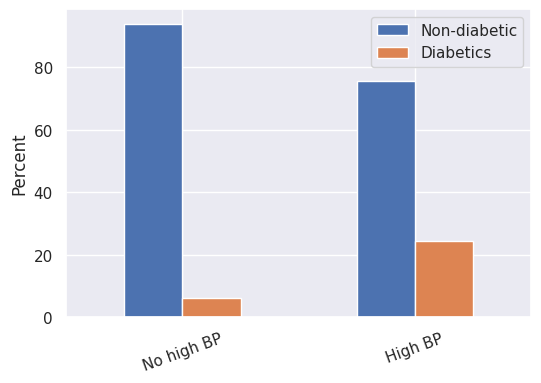

In [ ]:
#Do individuals with diabetes have higher cholesterol? Instead of simply ploting the counts like we did above, let's plot the proportion.
# Create a contingency table
contingency = pd.crosstab(data.HighBP, data.Diabetes_binary)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
fig2 = row_percentages.plot(kind='bar')
fig2.set(xlabel=None)
fig2.set_xticklabels(['No high BP', 'High BP'], rotation=20)
fig2.legend(['Non-diabetic', 'Diabetics'],loc='upper right')
#plt.title('High cholesterol proportion across diabetics vs no-diabetes')
fig2.set_ylabel('Percent')
plt.savefig('bp.svg', bbox_inches = 'tight', dpi=300)
plt.show()

Diabetes_binary       0      1
Stroke                        
0                211310  32078
1                  7024   3268
______________________________________________
Diabetes_binary          0          1
Stroke                               
0                86.820221  13.179779
1                68.247182  31.752818


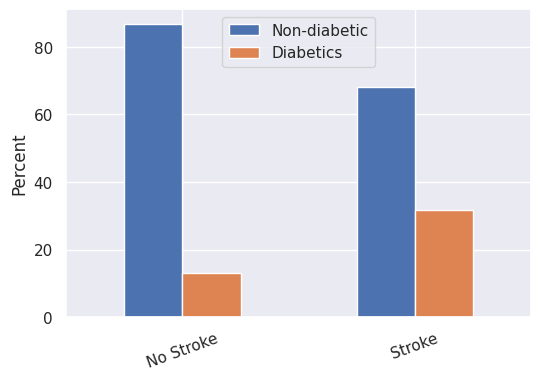

In [ ]:
# Create a contingency table
contingency = pd.crosstab(data.Stroke, data.Diabetes_binary)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
fig3 = row_percentages.plot(kind='bar')
fig3.set(xlabel=None)
fig3.set_xticklabels(['No Stroke', 'Stroke'], rotation=20)
fig3.legend(['Non-diabetic', 'Diabetics'],loc='upper center')
#plt.title('High cholesterol proportion across diabetics vs no-diabetes')
fig3.set_ylabel('Percent')
plt.savefig('stroke.svg', bbox_inches = 'tight', dpi=300)
plt.show()

Diabetes_binary            0      1
HeartDiseaseorAttack               
0                     202319  27468
1                      16015   7878
______________________________________________
Diabetes_binary               0          1
HeartDiseaseorAttack                      
0                     88.046321  11.953679
1                     67.028000  32.972000


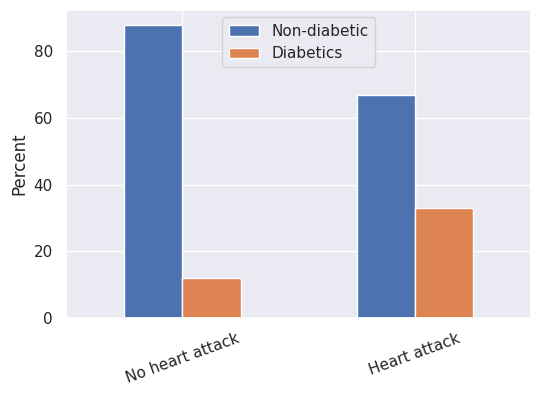

In [ ]:
# Create a contingency table
contingency = pd.crosstab(data.HeartDiseaseorAttack, data.Diabetes_binary)
# Calculate row percentages
row_percentages = contingency.div(contingency.sum(axis=1), axis=0) * 100
print(contingency)
print('______________________________________________')
print(row_percentages)
# Visualize high cholesterol proportions
fig4 = row_percentages.plot(kind='bar')
fig4.set(xlabel=None)
fig4.set_xticklabels(['No heart attack', 'Heart attack'], rotation=20)
fig4.legend(['Non-diabetic', 'Diabetics'],loc='upper center')
#plt.title('High cholesterol proportion across diabetics vs no-diabetes')
fig4.set_ylabel('Percent')
plt.savefig('heart.svg', bbox_inches = 'tight', dpi=300)
plt.show()

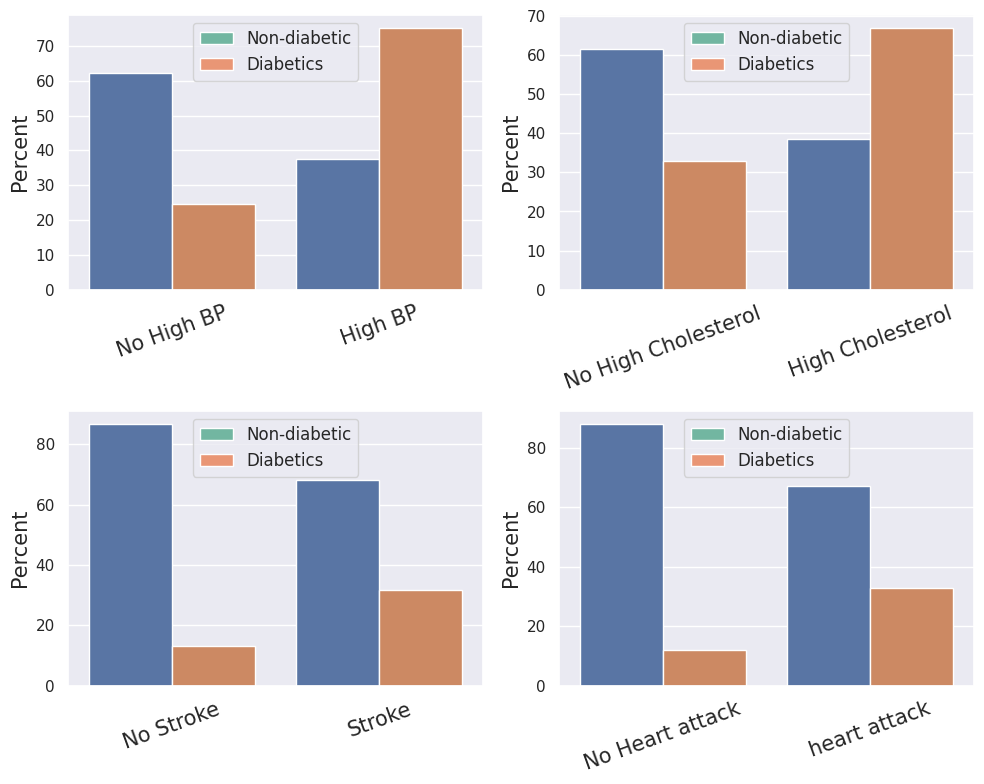

In [ ]:
#Instead of plotting just one char, lets plot several chart in a subplot.

# Create the first contingency table
df1 = df.groupby('Diabetes_binary')['HighBP'].value_counts(normalize=True)
df1 = df1.mul(100).rename('Percent').reset_index()

# Create the second contingency table
df2 = df.groupby('Diabetes_binary')['HighChol'].value_counts(normalize=True)
df2 = df2.mul(100).rename('Percent').reset_index()

# Create the Third contingency table
df3 = df.groupby('Stroke')['Diabetes_binary'].value_counts(normalize=True)
df3 = df3.mul(100).rename('Percent').reset_index()

#4th table.
df4 = df.groupby('HeartDiseaseorAttack')['Diabetes_binary'].value_counts(normalize=True)
df4 = df4.mul(100).rename('Percent').reset_index()

labels=["Non-diabetic", "Diabetics"]
# Plot the data on each subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1=sns.barplot(x='HighBP', y='Percent', hue='Diabetes_binary', data=df1, legend=True,ax=axes[0,0])
ax1.set(xlabel=None)
ax1.set_xticks([0,1])
ax1.set_xticklabels(['No High BP', 'High BP'], rotation=20,fontsize=15)
h, l = ax.get_legend_handles_labels()
ax1.legend(h, labels, fontsize=12)
ax1.set_ylabel('Percent', fontsize=15)

ax2=sns.barplot(x='HighChol', y='Percent', hue='Diabetes_binary', data=df2, legend=True,ax=axes[0,1])
ax2.set(xlabel=None)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['No High Cholesterol', 'High Cholesterol'], rotation=20,fontsize=15)
h, l = ax.get_legend_handles_labels()
ax2.legend(h, labels, fontsize=12)
ax2.set_ylabel('Percent', fontsize=15)

ax3=sns.barplot(x='Stroke', y='Percent', hue='Diabetes_binary', data=df3, legend=True,ax=axes[1,0])
ax3.set(xlabel=None)
ax3.set_xticks([0,1])
ax3.set_xticklabels(['No Stroke', 'Stroke'], rotation=20,fontsize=15)
h, l = ax.get_legend_handles_labels()
ax3.legend(h, labels, fontsize=12,loc='upper center')
ax3.set_ylabel('Percent', fontsize=15)

ax4=sns.barplot(x='HeartDiseaseorAttack', y='Percent', hue='Diabetes_binary', data=df4, legend=True,ax=axes[1,1])
ax4.set(xlabel=None)
ax4.set_xticks([0,1])
ax4.set_xticklabels(['No Heart attack', 'heart attack'], rotation=20,fontsize=15)
h, l = ax.get_legend_handles_labels()
ax4.legend(h, labels, fontsize=12,loc='upper center')
ax4.set_ylabel('Percent', fontsize=15)
# Adjust the layout
plt.tight_layout()

plt.savefig('TwobyTwo.svg', bbox_inches = 'tight', dpi=300)
plt.show()

Different ways of presenting

In [ ]:
new_df = df.groupby('HvyAlcoholConsump')['Diabetes_binary'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
new_df


HvyAlcoholConsump  Diabetes_binary    Percent
0                  0                0  85.584570
1                  0                1  14.415430
2                  1                0  94.163861
3                  1                1   5.836139

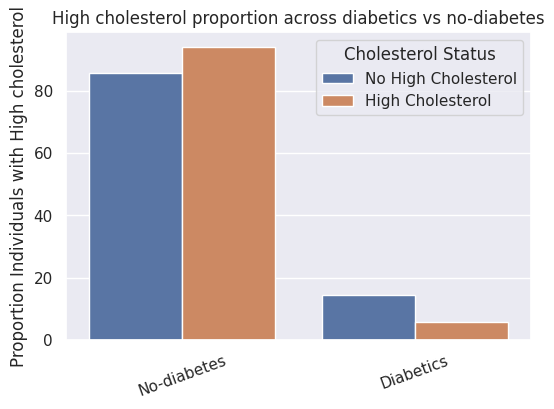

In [ ]:
labels=['No High Cholesterol', 'High Cholesterol']
ax=sns.barplot(x='Diabetes_binary', y='Percent', hue='HvyAlcoholConsump', data=new_df, legend=True)
ax.set(xlabel=None)
ax.set_xticks([0,1])
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
plt.title('High cholesterol proportion across diabetics vs no-diabetes')
ax.set_ylabel('Proportion Individuals with High cholesterol')

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Cholesterol Status")
plt.show()

This tells us that 22% with high ch have diabetes whereas only 7% have diabetes with low ch.

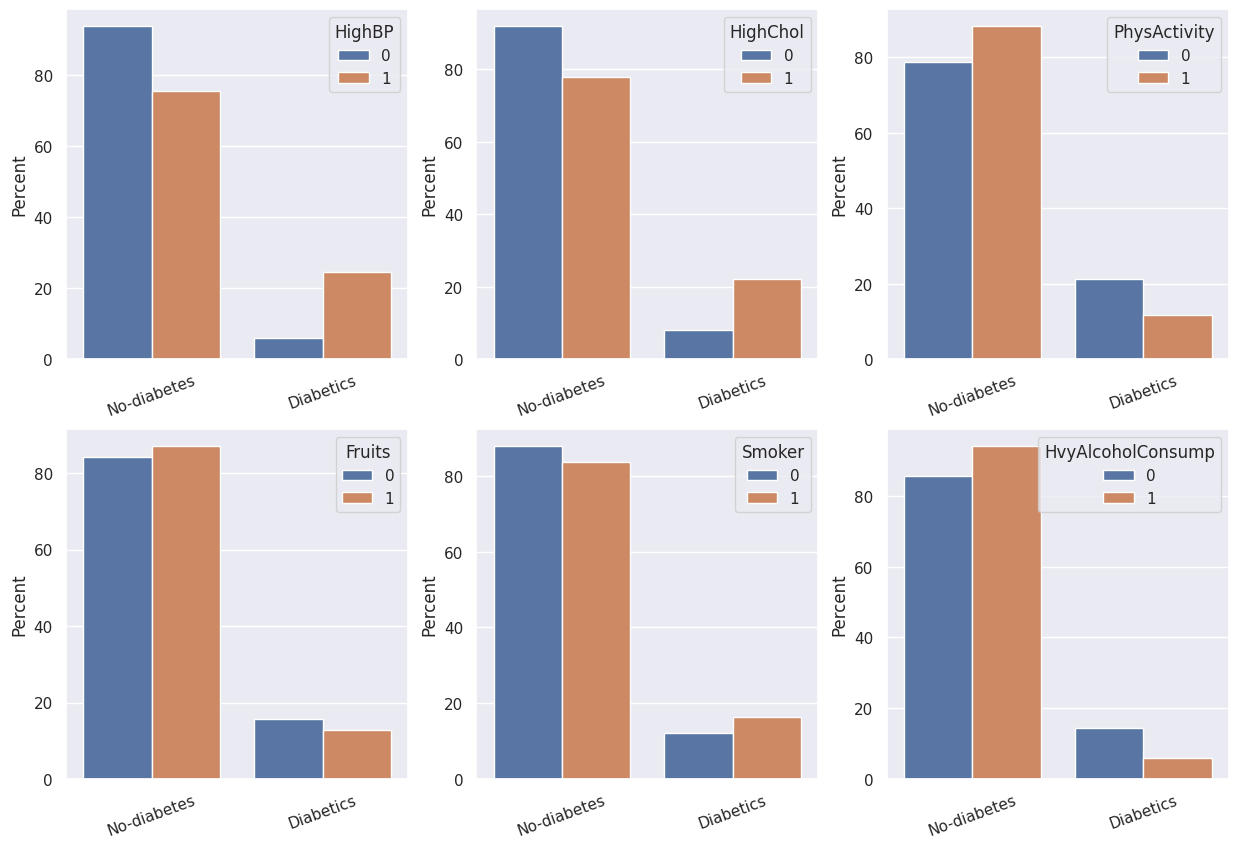

In [ ]:
#Instead of plotting just one char, lets plot several chart in a subplot.

# Create the first contingency table
df1 = df.groupby('HighBP')['Diabetes_binary'].value_counts(normalize=True)
df1 = df1.mul(100).rename('Percent').reset_index()

# Create the second contingency table
df2 = df.groupby('HighChol')['Diabetes_binary'].value_counts(normalize=True)
df2 = df2.mul(100).rename('Percent').reset_index()

# Create the Third contingency table
df3 = df.groupby('PhysActivity')['Diabetes_binary'].value_counts(normalize=True)
df3 = df3.mul(100).rename('Percent').reset_index()

#4th table.
df4 = df.groupby('Fruits')['Diabetes_binary'].value_counts(normalize=True)
df4 = df4.mul(100).rename('Percent').reset_index()

#5th table.
df5 = df.groupby('Smoker')['Diabetes_binary'].value_counts(normalize=True)
df5 = df5.mul(100).rename('Percent').reset_index()

#6th table.
df6 = df.groupby('HvyAlcoholConsump')['Diabetes_binary'].value_counts(normalize=True)
df6 = df6.mul(100).rename('Percent').reset_index()


# Plot the data on each subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax1=sns.barplot(x='Diabetes_binary', y='Percent', hue='HighBP', data=df1, legend=True,ax=axes[0,0])
ax1.set(xlabel=None)
ax1.set_xticks([0,1])
ax1.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)

ax2=sns.barplot(x='Diabetes_binary', y='Percent', hue='HighChol', data=df2, legend=True,ax=axes[0,1])
ax2.set(xlabel=None)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)

ax3=sns.barplot(x='Diabetes_binary', y='Percent', hue='PhysActivity', data=df3, legend=True,ax=axes[0,2])
ax3.set(xlabel=None)
ax3.set_xticks([0,1])
ax3.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)

ax4=sns.barplot(x='Diabetes_binary', y='Percent', hue='Fruits', data=df4, legend=True,ax=axes[1,0])
ax4.set(xlabel=None)
ax4.set_xticks([0,1])
ax4.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)

ax5=sns.barplot(x='Diabetes_binary', y='Percent', hue='Smoker', data=df5, legend=True,ax=axes[1,1])
ax5.set(xlabel=None)
ax5.set_xticks([0,1])
ax5.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)

ax6=sns.barplot(x='Diabetes_binary', y='Percent', hue='HvyAlcoholConsump', data=df6, legend=True,ax=axes[1,2])
ax6.set(xlabel=None)
ax6.set_xticks([0,1])
ax6.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
plt.show()

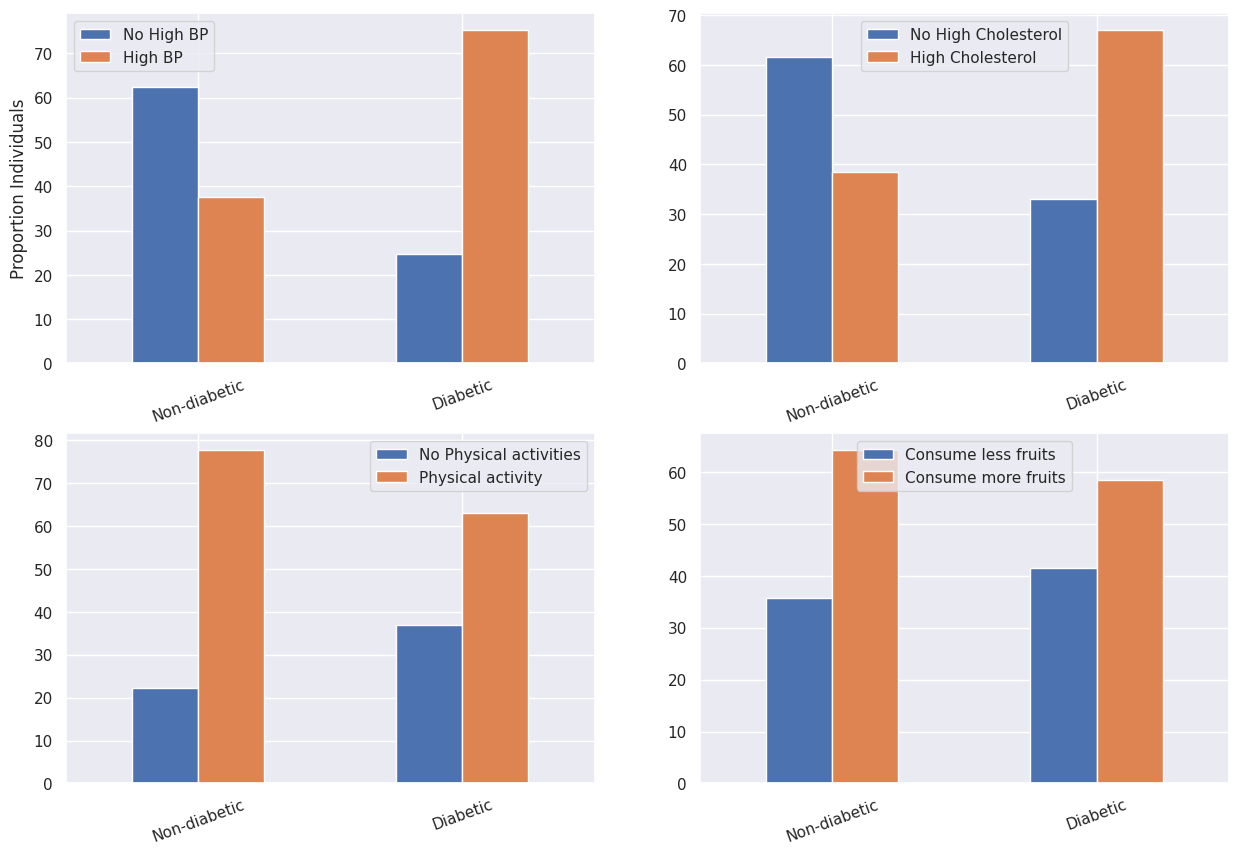

In [ ]:
#Instead of plotting just one char, lets plot several chart in a subplot.

# Create the first contingency table
df1 = pd.crosstab(df.Diabetes_binary, df.HighBP)
# Create the second contingency table
df2 = pd.crosstab(df.Diabetes_binary, df.HighChol)
# Create the Third contingency table
df3 = pd.crosstab(df.Diabetes_binary, df.PhysActivity)
#4th table.
df4 = pd.crosstab(df.Diabetes_binary, df.Fruits)

# Calculate the proportions of each contingency table
# Calculate row percentages
df1_prop = df1.div(df1.sum(axis=1), axis=0) * 100
df2_prop = df2.div(df2.sum(axis=1), axis=0) * 100
df3_prop = df3.div(df3.sum(axis=1), axis=0) * 100
df4_prop = df4.div(df4.sum(axis=1), axis=0) * 100

# Plot the data on each subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax1=df1_prop.plot(kind='bar', ax=axes[0,0])
ax1.set(xlabel=None)
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Non-diabetic', 'Diabetic'], rotation=20)
ax1.set_ylabel('Proportion Individuals')
ax1.legend(['No High BP', 'High BP'])

ax2=df2_prop.plot(kind='bar', ax=axes[0,1])
ax2.set(xlabel=None)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['Non-diabetic', 'Diabetic'], rotation=20)
ax2.legend(['No High Cholesterol', 'High Cholesterol'],loc='upper center')

ax3=df3_prop.plot(kind='bar', ax=axes[1,0])
ax3.set(xlabel=None)
ax3.set_xticks([0,1])
ax3.set_xticklabels(['Non-diabetic', 'Diabetic'], rotation=20)
ax3.legend(['No Physical activities', 'Physical activity'],loc='upper right')

ax4=df4_prop.plot(kind='bar', ax=axes[1,1])
ax4.set(xlabel=None)
ax4.set_xticks([0,1])
ax4.set_xticklabels(['Non-diabetic', 'Diabetic'], rotation=20)
ax4.legend(['Consume less fruits ', 'Consume more fruits'],loc='upper center')
plt.show()

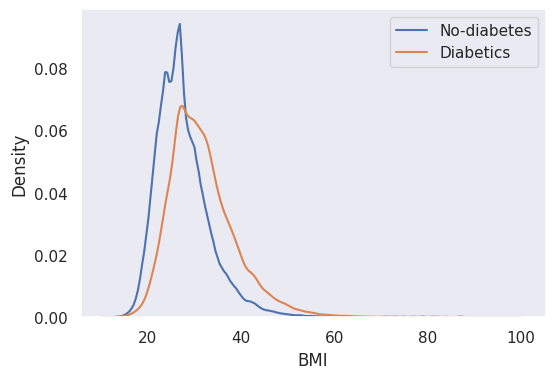

In [ ]:
# Check visually how BMI distribution looks like using overlaying KDE plots.
sns.kdeplot(df[df['Diabetes_binary'] == 0] ['BMI'])
sns.kdeplot(df[df['Diabetes_binary'] == 1] ['BMI'])
plt.grid()
#plt.title('BMI distribution of Diabetes vs Non-diabetic')
plt.legend(['No-diabetes', 'Diabetics'])
plt.savefig('BMI.svg', bbox_inches = 'tight', dpi=300)
plt.show()

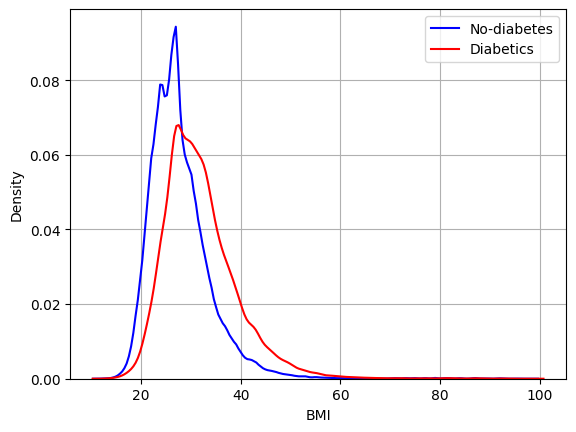

In [ ]:
# Check visually how BMI distribution looks like using overlaying KDE plots.
sns.kdeplot(df[df['Diabetes_binary'] == 0] ['BMI'],color='blue')
sns.kdeplot(df[df['Diabetes_binary'] == 1] ['BMI'],color='red')
plt.grid()
#plt.title('BMI distribution of Diabetes vs Non-diabetic')
plt.legend(['No-diabetes', 'Diabetics'])
plt.savefig('BMI.svg', bbox_inches = 'tight', dpi=300)
plt.show()

NOTE: I also did this above, but  this plot looks better.

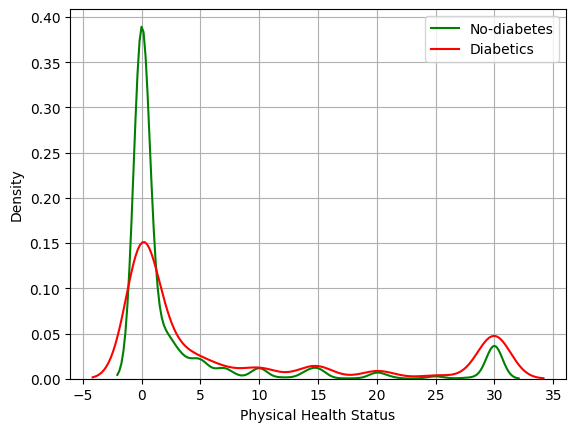

In [ ]:
# Check visually how BMI distribution looks like using overlaying KDE plots.
sns.kdeplot(df[df['Diabetes_binary'] == 0] ['PhysHlth'],color='green')
sns.kdeplot(df[df['Diabetes_binary'] == 1] ['PhysHlth'],color='red')
plt.grid()
plt.legend(['No-diabetes', 'Diabetics'])
plt.gca().set_xlabel('Physical Health Status')
plt.savefig('PhysHlth.png', bbox_inches = 'tight', dpi=300)
plt.show()

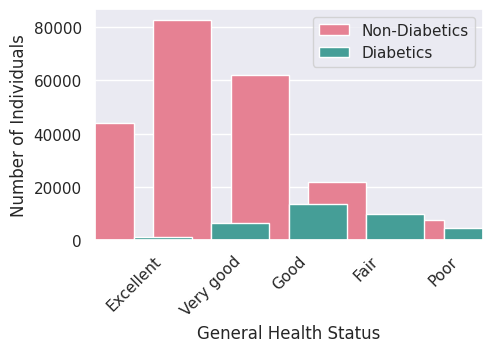

In [ ]:
sns.set(rc={'figure.figsize':(5, 3)})
plt.rcParams['figure.figsize']=(5, 3)
# Create a count plot
# Create a list of labels for the x-axis ticks
labels = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
gh=sns.countplot(x = 'GenHlth', hue = 'Diabetes_binary', data = data, width=1.5, alpha=1,palette='husl')
gh.set_xticks([0,1, 2, 3,4])
gh.set_xticklabels(labels, rotation = 45)
gh.legend(['Non-Diabetics', 'Diabetics'])
gh.set_xlabel('General Health Status')
gh.set_ylabel('Number of Individuals')
plt.savefig('GenHlth.png', bbox_inches = 'tight', dpi=300)
#plt.savefig('countplot.png', dpi=300)
plt.show()

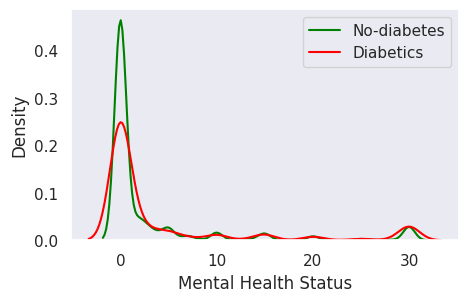

In [ ]:
# Check visually how BMI distribution looks like using overlaying KDE plots.
sns.kdeplot(df[df['Diabetes_binary'] == 0] ['MentHlth'],color='green')
sns.kdeplot(df[df['Diabetes_binary'] == 1] ['MentHlth'],color='red')
plt.grid()
plt.legend(['No-diabetes', 'Diabetics'])
plt.gca().set_xlabel('Mental Health Status')
plt.savefig('MenHlth.png', bbox_inches = 'tight', dpi=300)
plt.show()

Instead of creating plots one by one, let's create them all at once.

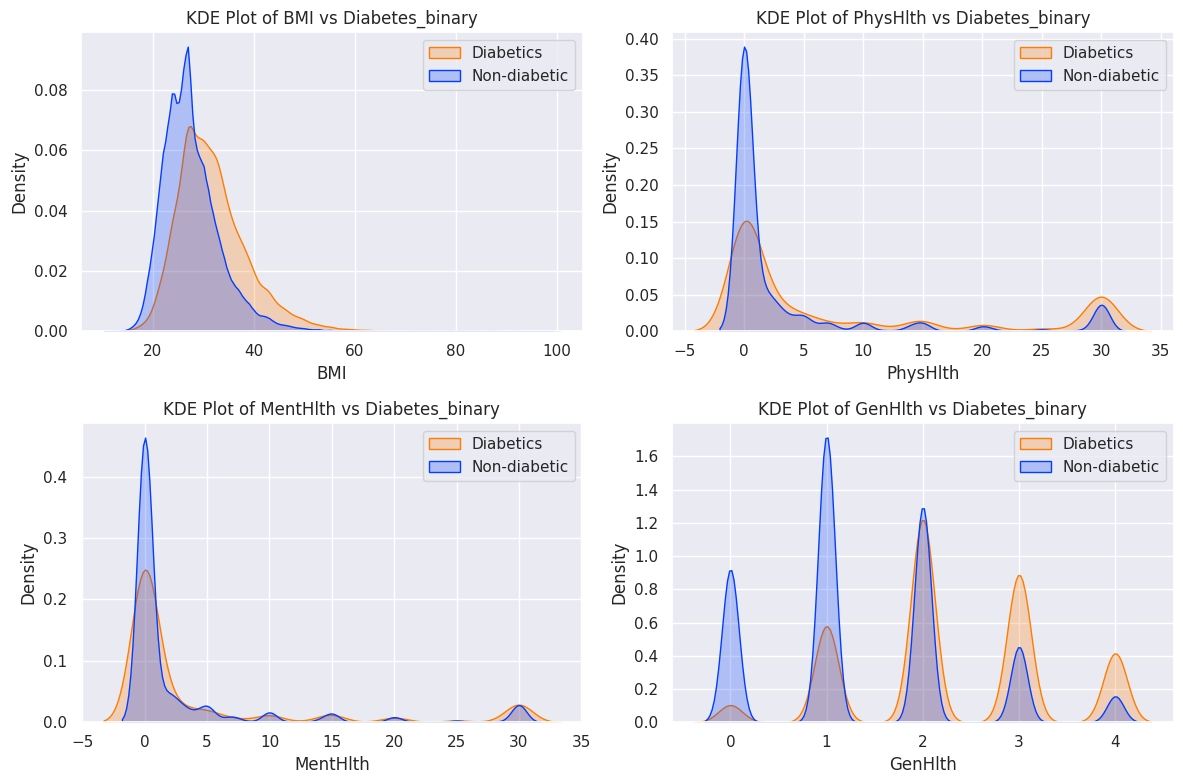

In [ ]:
##Plotting above KDE plots in a grid.

# Set smaller plot sizes
sns.set(rc={'figure.figsize': (6, 4)})
plt.rcParams['figure.figsize'] = (6, 4)

# Add the magic command to render plots inline in the notebook
%matplotlib inline

# Visualize the relationship between a numerical variable and a categorical variable using horizontal density plots
num_cols = ['BMI', 'PhysHlth', 'MentHlth', 'GenHlth']
cat_cols = ['Diabetes_binary']


num_plots = len(num_cols)
cat_plots = len(cat_cols)

# Calculate the total number of subplots needed
total_plots = num_plots * cat_plots

# Calculate the number of rows and columns needed for the subplot grid
num_rows = total_plots // 2 + (total_plots % 2)
num_cols_per_row = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(12, 4*num_rows))

# Loop through each numerical and categorical variable combination
for i in range(num_rows):
    for j in range(num_cols_per_row):
        index = i * num_cols_per_row + j
        if index >= total_plots:
            break  # Exit the loop when all subplots are filled
        ax = axes[i, j]  # Access the current subplot
        num_col = num_cols[index // cat_plots]
        cat_col = cat_cols[index % cat_plots]
        sns.kdeplot(data=data, x=num_col, hue=cat_col, ax=ax, fill=True, common_norm=False, palette='bright')
        ax.set_title(f'KDE Plot of {num_col} vs {cat_col}')
        ax.set_xlabel(num_col)
        ax.set_ylabel('Density')
        ax.legend(['Diabetics', 'Non-diabetic'],loc='upper right')

# Adjust layout and display
plt.tight_layout()
display(plt.gcf())  # Display the current plot inline
plt.close()  # Close the plot to avoid duplicate display

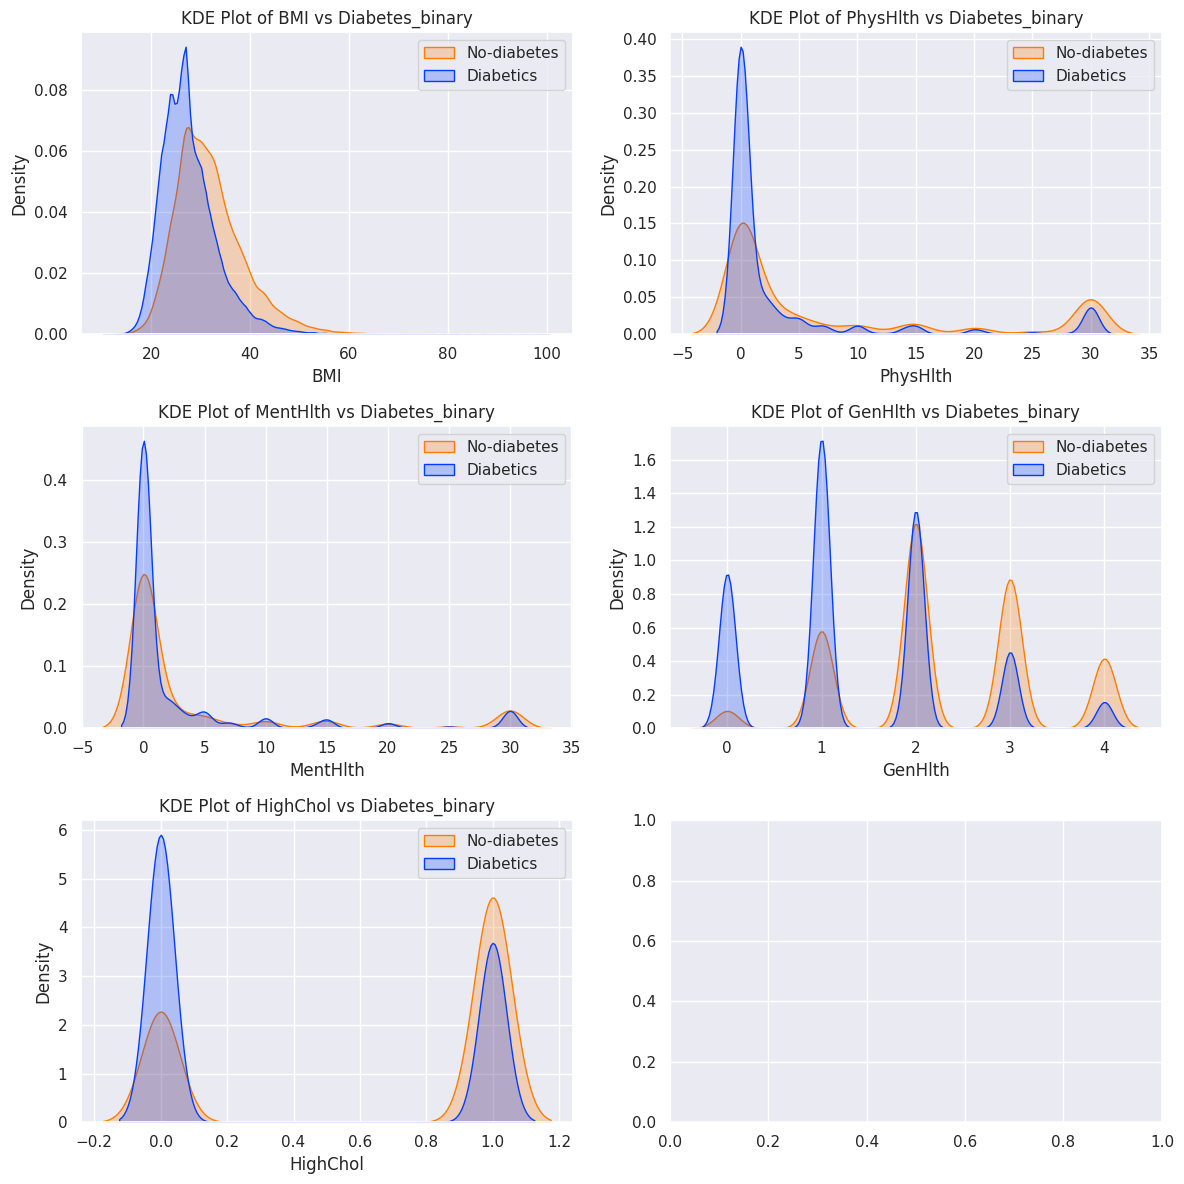

In [ ]:
##Plotting above KDE plots in a grid.

# Set smaller plot sizes
sns.set(rc={'figure.figsize': (6, 4)})
plt.rcParams['figure.figsize'] = (6, 4)

# Add the magic command to render plots inline in the notebook
%matplotlib inline

# Visualize the relationship between a numerical variable and a categorical variable using horizontal density plots
num_cols = ['BMI', 'PhysHlth', 'MentHlth', 'GenHlth','HighChol']
cat_cols = ['Diabetes_binary']


num_plots = len(num_cols)
cat_plots = len(cat_cols)

# Calculate the total number of subplots needed
total_plots = num_plots * cat_plots

# Calculate the number of rows and columns needed for the subplot grid
num_rows = total_plots // 2 + (total_plots % 2)
num_cols_per_row = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(12, 4*num_rows))

# Loop through each numerical and categorical variable combination
for i in range(num_rows):
    for j in range(num_cols_per_row):
        index = i * num_cols_per_row + j
        if index >= total_plots:
            break  # Exit the loop when all subplots are filled
        ax = axes[i, j]  # Access the current subplot
        num_col = num_cols[index // cat_plots]
        cat_col = cat_cols[index % cat_plots]
        sns.kdeplot(data=data, x=num_col, hue=cat_col, ax=ax, fill=True, common_norm=False, palette='bright')
        ax.set_title(f'KDE Plot of {num_col} vs {cat_col}')
        ax.set_xlabel(num_col)
        ax.set_ylabel('Density')
        ax.legend(['No-diabetes', 'Diabetics'],loc='upper right')

# Adjust layout and display
plt.tight_layout()
display(plt.gcf())  # Display the current plot inline
plt.close()  # Close the plot to avoid duplicate display

**Observations**:

---


Based on the above plots, we noticed following:
1. The average BMI for diabetes patients is higher than non-diabetic patients.
2. Higher number of diabetic individuals during the past 30 days had their physical health not in good condition. In orther words, the probabuility of having poor physical health is significantly higher among diabetes individuals.
3. In the similar manner, the  higher number of diabetes individuals during the past 30 days had their mental health not in good condition. The probability of having poor mental health is significantly higher among diabetes individuals compared to non-diabetic individuals.
4. To summarize, higher number of diabetes individuals have poor general health compared to the non-diabetes individuals. The probability of having better general health is higher among non-diabetic individuals compared to diabetic individuals.

**In addition to the visual plots, let's actually compute the mean BMI for each group.**

In [ ]:
DM_yesBMI= df[df['Diabetes_binary'] == 1] ['BMI'].mean()
DM_noBMI= df[df['Diabetes_binary'] == 0] ['BMI'].mean()
print('Average BMI for diabetics is:')
print(DM_yesBMI)
print('Average BMI for Non-diabetics is:')
print(DM_noBMI)

Average BMI for diabetics is:
31.94401063769592
Average BMI for Non-diabetics is:
27.80577005871738


In [ ]:
DM_yesPH= df[df['Diabetes_binary'] == 1] ['PhysHlth'].mean()
DM_noPH= df[df['Diabetes_binary'] == 0] ['PhysHlth'].mean()
print('Average days of not having a good physical health for diabetics is:')
print(DM_yesPH)
print('Average days of not having a good physical health for Non-diabetics is:')
print(DM_noPH)

Average days of not having a good physical health for diabetics is:
7.954478583149437
Average days of not having a good physical health for Non-diabetics is:
3.6410820119633223


In [ ]:
DM_yesMH= df[df['Diabetes_binary'] == 1] ['MentHlth'].mean()
DM_noMH= df[df['Diabetes_binary'] == 0] ['MentHlth'].mean()
print('Average days of not having a good mental health for diabetics is:')
print(DM_yesMH)
print('Average days of not having a good mental health for Non-diabetics is:')
print(DM_noMH)

Average days of not having a good mental health for diabetics is:
4.461806144966899
Average days of not having a good mental health for Non-diabetics is:
2.978033654859069


Indeed, the average BMI, days of not having good physical and mental health is higher among diabetes individuals!

##**Overall observation**:

---


1. Both gender are equally vulnerable to diabetes.
2. Age groups that are most affected by diabetes 60+.
3. Individuals with diabetes have higher BMI, days of not having good physical and mental health compared to non-diabetic individuals.
4. Individuals with diabetes tend to have high cholesterol levels and high blood pressure.
5. Individuals with diabetes have fewer physical activities and difficulty walking.
6. There is no visible association between smoking and alcohol consumption. In orther words, smoking and alcohol consumption doesn't affect diabetes status much.
7. Variables correlated with diabetes status are general health, high blood pressure, high cholesterol, BMI, difficulties in walking, and age.

##END of Exploratory Data Analysis (EDA)